### ***``ANOVA, Post-hoc tests, Normality and Homogenity tests on India's Population & COVID-19 datasets``***

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

import scipy
import statsmodels as stm

In [2]:
pd.set_option('display.max_rows',50)

In [3]:
state_dly_cases = pd.read_csv("Datasets/covid_19_india.csv")

In [4]:
state_dly_cases.tail()

Sno      Date     Time State/UnionTerritory ConfirmedIndianNational  \
8481  8482  16/11/20  8:00 AM            Telengana                       -   
8482  8483  16/11/20  8:00 AM              Tripura                       -   
8483  8484  16/11/20  8:00 AM          Uttarakhand                       -   
8484  8485  16/11/20  8:00 AM        Uttar Pradesh                       -   
8485  8486  16/11/20  8:00 AM          West Bengal                       -   

     ConfirmedForeignNational   Cured  Deaths  Confirmed  
8481                        -  242084    1407     257876  
8482                        -   30555     364      31962  
8483                        -   62543    1107      68215  
8484                        -  480965    7372     511304  
8485                        -  394576    7661     431551

In [5]:
state_ws_test = pd.read_csv("Datasets/StatewiseTestingDetails.csv")

In [6]:
state_ws_test.tail()

Date        State  TotalSamples Negative  Positive
7307  2020-11-11  West Bengal     5047335.0      NaN       NaN
7308  2020-11-12  West Bengal     5091700.0      NaN       NaN
7309  2020-11-13  West Bengal     5136012.0      NaN       NaN
7310  2020-11-14  West Bengal     5180139.0      NaN       NaN
7311  2020-11-15  West Bengal     5218797.0      NaN       NaN

In [7]:
state_ws_test.shape

(7312, 5)

In [8]:
india_pop = pd.read_csv("Datasets/population_india_census2011.csv.txt")

In [9]:
india_pop.head()

Sno State / Union Territory  Population  Rural population  \
0    1           Uttar Pradesh   199812341         155317278   
1    2             Maharashtra   112374333          61556074   
2    3                   Bihar   104099452          92341436   
3    4             West Bengal    91276115          62183113   
4    5          Madhya Pradesh    72626809          52557404   

   Urban population                         Area                  Density  \
0          44495063   240,928 km2 (93,023 sq mi)    828/km2 (2,140/sq mi)   
1          50818259  307,713 km2 (118,809 sq mi)      365/km2 (950/sq mi)   
2          11758016    94,163 km2 (36,357 sq mi)  1,102/km2 (2,850/sq mi)   
3          29093002    88,752 km2 (34,267 sq mi)  1,029/km2 (2,670/sq mi)   
4          20069405  308,245 km2 (119,014 sq mi)      236/km2 (610/sq mi)   

   Gender Ratio  
0           912  
1           929  
2           918  
3           953  
4           931

In [10]:
india_pop.shape

(36, 8)

##### **Merging the State Population and State wise testing dataframes**

In [11]:
np.count_nonzero(state_ws_test['State'].unique())

35

In [12]:
np.count_nonzero(india_pop['State / Union Territory'].unique())

36

In [13]:
set(india_pop['State / Union Territory'].unique()) - set(state_ws_test['State'].unique())

{'Lakshadweep', 'Telengana'}

In [14]:
np.sort(india_pop['State / Union Territory'].unique())

array(['Andaman and Nicobar Islands', 'Andhra Pradesh',
       'Arunachal Pradesh', 'Assam', 'Bihar', 'Chandigarh',
       'Chhattisgarh', 'Dadra and Nagar Haveli and Daman and Diu',
       'Delhi', 'Goa', 'Gujarat', 'Haryana', 'Himachal Pradesh',
       'Jammu and Kashmir', 'Jharkhand', 'Karnataka', 'Kerala', 'Ladakh',
       'Lakshadweep', 'Madhya Pradesh', 'Maharashtra', 'Manipur',
       'Meghalaya', 'Mizoram', 'Nagaland', 'Odisha', 'Puducherry',
       'Punjab', 'Rajasthan', 'Sikkim', 'Tamil Nadu', 'Telengana',
       'Tripura', 'Uttar Pradesh', 'Uttarakhand', 'West Bengal'],
      dtype=object)

In [15]:
np.sort(state_ws_test['State'].unique())

array(['Andaman and Nicobar Islands', 'Andhra Pradesh',
       'Arunachal Pradesh', 'Assam', 'Bihar', 'Chandigarh',
       'Chhattisgarh', 'Dadra and Nagar Haveli and Daman and Diu',
       'Delhi', 'Goa', 'Gujarat', 'Haryana', 'Himachal Pradesh',
       'Jammu and Kashmir', 'Jharkhand', 'Karnataka', 'Kerala', 'Ladakh',
       'Madhya Pradesh', 'Maharashtra', 'Manipur', 'Meghalaya', 'Mizoram',
       'Nagaland', 'Odisha', 'Puducherry', 'Punjab', 'Rajasthan',
       'Sikkim', 'Tamil Nadu', 'Telangana', 'Tripura', 'Uttar Pradesh',
       'Uttarakhand', 'West Bengal'], dtype=object)

##### **Here, I found out that ``State wise COVID testing dataset`` has no information about testing carried out in ``Lakshadweep``. And, ``Telangana`` spelling is incorrect in ``Indian Pop dataset``.**

In [16]:
india_pop['State / Union Territory'] = india_pop['State / Union Territory'].apply(lambda state: 'Telangana' if state == 'Telengana' else state)

In [17]:
set(india_pop['State / Union Territory'].unique()) - set(state_ws_test['State'].unique()) 

{'Lakshadweep'}

In [18]:
pop_test_df = pd.merge(left=state_ws_test,right=india_pop,left_on='State',right_on='State / Union Territory',how='outer')

In [19]:
pop_test_df.shape

(7313, 13)

In [20]:
pop_test_df.tail()

Date        State  TotalSamples Negative  Positive  Sno  \
7308  2020-11-12  West Bengal     5091700.0      NaN       NaN    4   
7309  2020-11-13  West Bengal     5136012.0      NaN       NaN    4   
7310  2020-11-14  West Bengal     5180139.0      NaN       NaN    4   
7311  2020-11-15  West Bengal     5218797.0      NaN       NaN    4   
7312         NaN          NaN           NaN      NaN       NaN   36   

     State / Union Territory  Population  Rural population  Urban population  \
7308             West Bengal    91276115          62183113          29093002   
7309             West Bengal    91276115          62183113          29093002   
7310             West Bengal    91276115          62183113          29093002   
7311             West Bengal    91276115          62183113          29093002   
7312             Lakshadweep       64473             14141             50332   

                           Area                  Density  Gender Ratio  
7308  88,752 km2 (34,267 sq mi)  1,029/km2 (2,670/sq mi)           953  
7309  88,752 km2 (34,267 sq mi)  1,029/km2 (2,670/sq mi)           953  
7310  88,752 km2 (34,267 sq mi)  1,029/km2 (2,670/sq mi)           953  
7311  88,752 km2 (34,267 sq mi)  1,029/km2 (2,670/sq mi)           953  
7312          32 km2 (12 sq mi)  2,013/km2 (5,210/sq mi)           946

##### **Getting rid of few features :: ``Sno`` as it is a dummy running sequence number and ``State`` as we already have ``State / Union Territory`` providing the same information.** 

In [21]:
pop_test_df.drop(labels=['Sno','State'],axis=1,inplace=True)

##### **Renaming ``State / Union Territory`` as ``State``.**

In [22]:
pop_test_df.rename(columns={'State / Union Territory':'State'},inplace=True)

In [23]:
pd.concat([pop_test_df.head(3),pop_test_df.tail(3)],axis=0)

Date  TotalSamples Negative  Positive  \
0     2020-04-17        1403.0     1210      12.0   
1     2020-04-24        2679.0      NaN      27.0   
2     2020-04-27        2848.0      NaN      33.0   
7310  2020-11-14     5180139.0      NaN       NaN   
7311  2020-11-15     5218797.0      NaN       NaN   
7312         NaN           NaN      NaN       NaN   

                            State  Population  Rural population  \
0     Andaman and Nicobar Islands      380581            237093   
1     Andaman and Nicobar Islands      380581            237093   
2     Andaman and Nicobar Islands      380581            237093   
7310                  West Bengal    91276115          62183113   
7311                  West Bengal    91276115          62183113   
7312                  Lakshadweep       64473             14141   

      Urban population                       Area                  Density  \
0               143488    8,249 km2 (3,185 sq mi)       46/km2 (120/sq mi)   
1               143488    8,249 km2 (3,185 sq mi)       46/km2 (120/sq mi)   
2               143488    8,249 km2 (3,185 sq mi)       46/km2 (120/sq mi)   
7310          29093002  88,752 km2 (34,267 sq mi)  1,029/km2 (2,670/sq mi)   
7311          29093002  88,752 km2 (34,267 sq mi)  1,029/km2 (2,670/sq mi)   
7312             50332          32 km2 (12 sq mi)  2,013/km2 (5,210/sq mi)   

      Gender Ratio  
0              876  
1              876  
2              876  
7310           953  
7311           953  
7312           946

In [24]:
pop_test_df['Density in km2'] = pop_test_df['Density'].apply(lambda row : np.float(row.split('/')[0].replace(",",'')))

In [25]:
pd.concat([pop_test_df.head(3),pop_test_df.tail(3)],axis=0)

Date  TotalSamples Negative  Positive  \
0     2020-04-17        1403.0     1210      12.0   
1     2020-04-24        2679.0      NaN      27.0   
2     2020-04-27        2848.0      NaN      33.0   
7310  2020-11-14     5180139.0      NaN       NaN   
7311  2020-11-15     5218797.0      NaN       NaN   
7312         NaN           NaN      NaN       NaN   

                            State  Population  Rural population  \
0     Andaman and Nicobar Islands      380581            237093   
1     Andaman and Nicobar Islands      380581            237093   
2     Andaman and Nicobar Islands      380581            237093   
7310                  West Bengal    91276115          62183113   
7311                  West Bengal    91276115          62183113   
7312                  Lakshadweep       64473             14141   

      Urban population                       Area                  Density  \
0               143488    8,249 km2 (3,185 sq mi)       46/km2 (120/sq mi)   
1               143488    8,249 km2 (3,185 sq mi)       46/km2 (120/sq mi)   
2               143488    8,249 km2 (3,185 sq mi)       46/km2 (120/sq mi)   
7310          29093002  88,752 km2 (34,267 sq mi)  1,029/km2 (2,670/sq mi)   
7311          29093002  88,752 km2 (34,267 sq mi)  1,029/km2 (2,670/sq mi)   
7312             50332          32 km2 (12 sq mi)  2,013/km2 (5,210/sq mi)   

      Gender Ratio  Density in km2  
0              876            46.0  
1              876            46.0  
2              876            46.0  
7310           953          1029.0  
7311           953          1029.0  
7312           946          2013.0

In [26]:
state_density_df = pop_test_df.groupby(['State'])[['Density in km2']].max().reset_index()

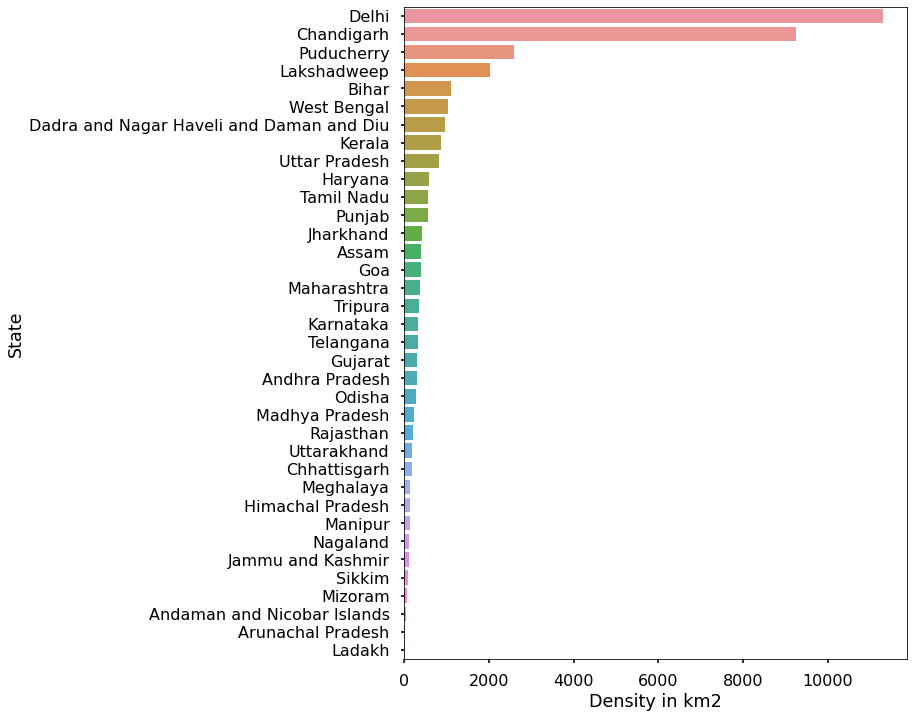

In [27]:
with plt.style.context('seaborn-poster'):
    plt.figure(figsize=(9,12))
    sns.barplot(data=state_density_df.sort_values(by='Density in km2',ascending=False),y='State',x='Density in km2',orient='h');

##### **``'Delhi'`` and ``'Chandigarh'`` totally stands out in this plot with the highest densities values.**

In [28]:
def dense_groups(density=0):
    """
    Description: This function defines the density group based on the state's density value.
    Input: It accepts only one parameter -- density (by default its 0)
    Return: Returns the density group name.
    """
    try:
        if 0<density<=300:
            grp_name = 'Dense1'
        elif 300<density<=600:
            grp_name = 'Dense2' 
        elif 600<density<=900:
            grp_name = 'Dense3'
        elif 900<density<=1200:
            grp_name = 'Dense4'
        else:
            grp_name = 'Dense5'
    except ValueError as err:
        pass
    return grp_name

In [29]:
pop_test_df['Dense_grp'] = list(map(dense_groups,pop_test_df['Density in km2']))

In [30]:
pop_test_df.head()

Date  TotalSamples Negative  Positive                        State  \
0  2020-04-17        1403.0     1210      12.0  Andaman and Nicobar Islands   
1  2020-04-24        2679.0      NaN      27.0  Andaman and Nicobar Islands   
2  2020-04-27        2848.0      NaN      33.0  Andaman and Nicobar Islands   
3  2020-05-01        3754.0      NaN      33.0  Andaman and Nicobar Islands   
4  2020-05-16        6677.0      NaN      33.0  Andaman and Nicobar Islands   

   Population  Rural population  Urban population                     Area  \
0      380581            237093            143488  8,249 km2 (3,185 sq mi)   
1      380581            237093            143488  8,249 km2 (3,185 sq mi)   
2      380581            237093            143488  8,249 km2 (3,185 sq mi)   
3      380581            237093            143488  8,249 km2 (3,185 sq mi)   
4      380581            237093            143488  8,249 km2 (3,185 sq mi)   

              Density  Gender Ratio  Density in km2 Dense_grp  
0  46/km2 (120/sq mi)           876            46.0    Dense1  
1  46/km2 (120/sq mi)           876            46.0    Dense1  
2  46/km2 (120/sq mi)           876            46.0    Dense1  
3  46/km2 (120/sq mi)           876            46.0    Dense1  
4  46/km2 (120/sq mi)           876            46.0    Dense1

In [31]:
state_ws_nulls_in_pos = pop_test_df[pop_test_df['Positive'].isna()].groupby(['State'])[['State']].count().rename(columns={'State':'Nulls_in_pos'}).reset_index()

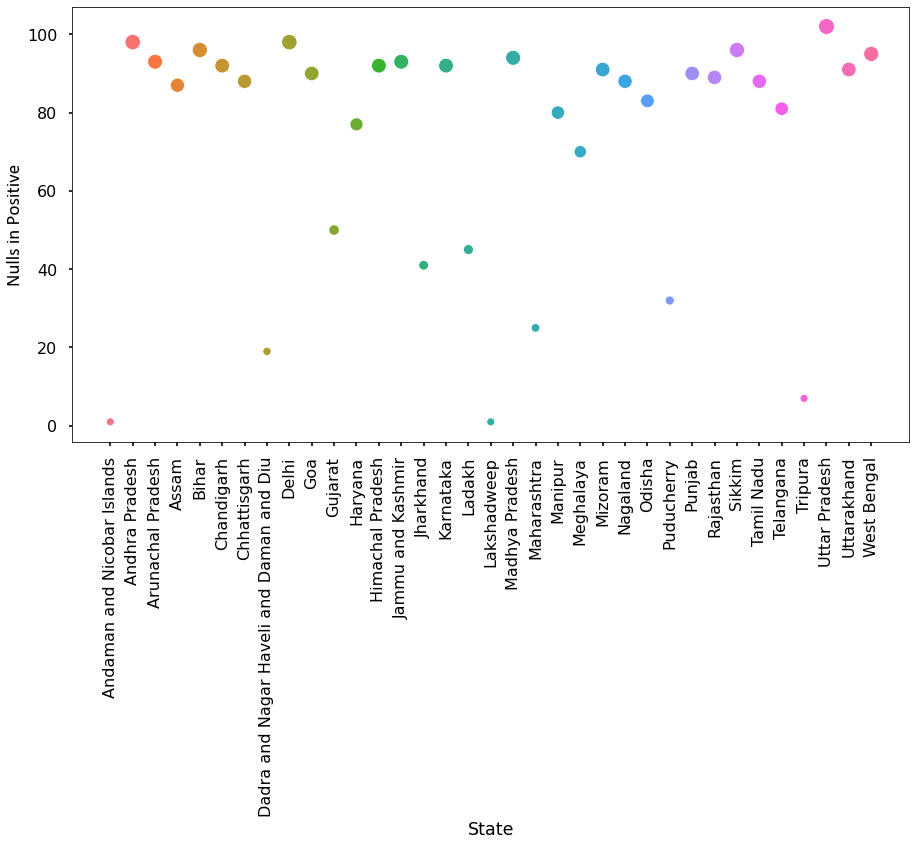

In [32]:
with plt.style.context('seaborn-poster'):
    plt.figure(figsize=(15,8))
    sns.scatterplot(data=state_ws_nulls_in_pos,x='State',y='Nulls_in_pos',size=((state_ws_nulls_in_pos['Nulls_in_pos']*.1)**2),hue='State',legend=False)
    plt.xticks(rotation=90)
    plt.ylabel("Nulls in Positive", fontdict={'size':19,'family':'calibri','style':'normal'})

##### **Here, we came to know that majority of the states have same number of NULLS in the positive cases.**

In [33]:
pop_test_df.head()

Date  TotalSamples Negative  Positive                        State  \
0  2020-04-17        1403.0     1210      12.0  Andaman and Nicobar Islands   
1  2020-04-24        2679.0      NaN      27.0  Andaman and Nicobar Islands   
2  2020-04-27        2848.0      NaN      33.0  Andaman and Nicobar Islands   
3  2020-05-01        3754.0      NaN      33.0  Andaman and Nicobar Islands   
4  2020-05-16        6677.0      NaN      33.0  Andaman and Nicobar Islands   

   Population  Rural population  Urban population                     Area  \
0      380581            237093            143488  8,249 km2 (3,185 sq mi)   
1      380581            237093            143488  8,249 km2 (3,185 sq mi)   
2      380581            237093            143488  8,249 km2 (3,185 sq mi)   
3      380581            237093            143488  8,249 km2 (3,185 sq mi)   
4      380581            237093            143488  8,249 km2 (3,185 sq mi)   

              Density  Gender Ratio  Density in km2 Dense_grp  
0  46/km2 (120/sq mi)           876            46.0    Dense1  
1  46/km2 (120/sq mi)           876            46.0    Dense1  
2  46/km2 (120/sq mi)           876            46.0    Dense1  
3  46/km2 (120/sq mi)           876            46.0    Dense1  
4  46/km2 (120/sq mi)           876            46.0    Dense1

In [34]:
def font_dicts(kind=['xlabel','ylabel','title']):
    """
    Description: This function is created for defining the font dictionaries of labels and titles for plots.
    
    Input parameters: It accepts only one below agrument:
            1. kind : Can take one of values --> ['xlabel','ylabel','title']
    
    Retuns: fdict with values of 'size', 'family' and 'color'
    """
    try:
        if kind == 'xlabel':
            fdict = {'size':16,'family':'calibri','style':'oblique','color':'blue'}
        elif kind == 'ylabel':
            fdict = {'size':16,'family':'calibri','style':'oblique','color':'k'}
        elif kind == 'title':
            fdict = {'size':17,'family':'calibri','style':'oblique','color':'brown'}
        else:
            fdict = {'size':16,'family':'calibri','style':'oblique','color':'k'}
    except ValueError as err:
        pass
    return fdict

In [35]:
def plot_hist_kde(d_frame,grp_by_col,dist_col,title=None):
    """
    Description: This function plot the distribution of data
    
    Input Parameters: It accepts below arguments:
            1. d_frame : Dataset of type pandas dataframe
            2. grp_by_col : Column for grouping the data of several states
            3. dist_col : Column whose data distribution to be visualized
            4. title : Title of the plot
    
    Return: None
    """
    all_states = d_frame[grp_by_col].unique()
    with plt.style.context('seaborn'):
        for state in all_states:
            plt.figure(figsize=(8,5))
            d_frame[d_frame[grp_by_col] == state][dist_col].plot(kind='hist',density=True,color='lightblue')
            sns.kdeplot(data=d_frame[d_frame[grp_by_col] == state][dist_col],color='coral',legend=False)
            plt.axvline(d_frame[d_frame[grp_by_col] == state][dist_col].mean(),linestyle='--',color='purple')
            plt.axvline(d_frame[d_frame[grp_by_col] == state][dist_col].median(),linestyle=':',color='black')
            plt.title(title,fontdict=font_dicts(kind='title'))
            plt.xlabel(state,fontdict=font_dicts(kind='xlabel'))
            plt.ylabel('Frequency',fontdict=font_dicts(kind='ylabel'))
            plt.xticks(size=13)
            plt.yticks(size=13)
            plt.legend(("Kde","Mean","Median"))
            plt.show()

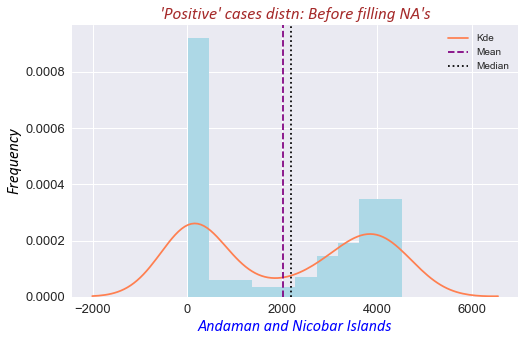

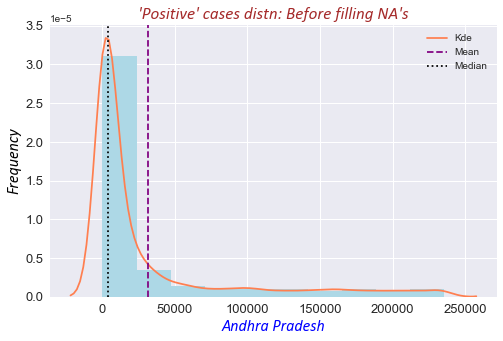

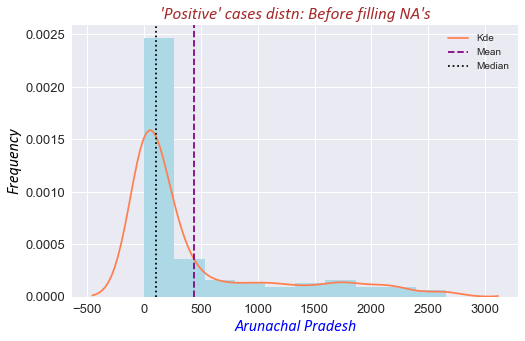

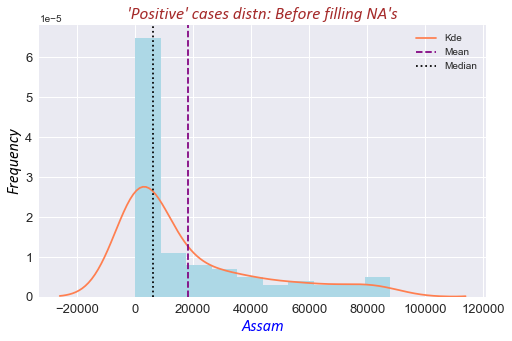

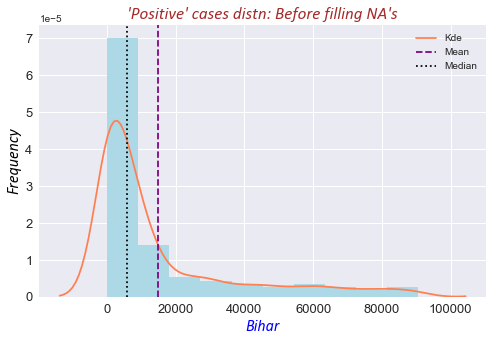

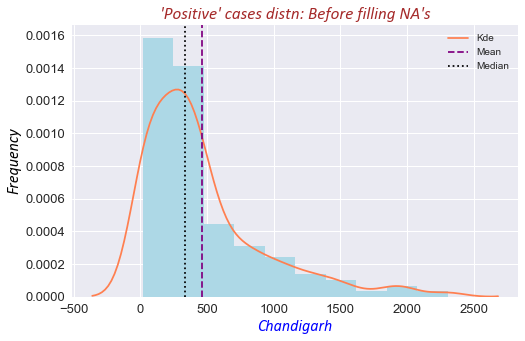

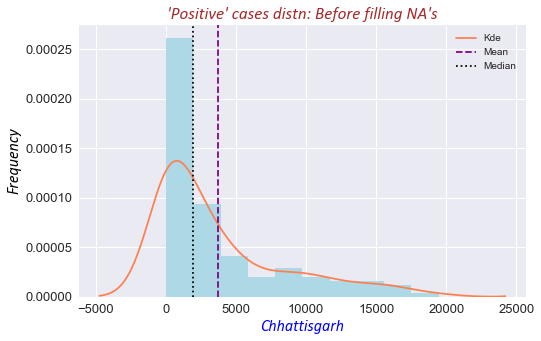

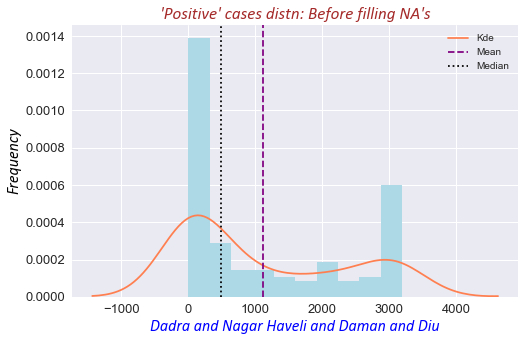

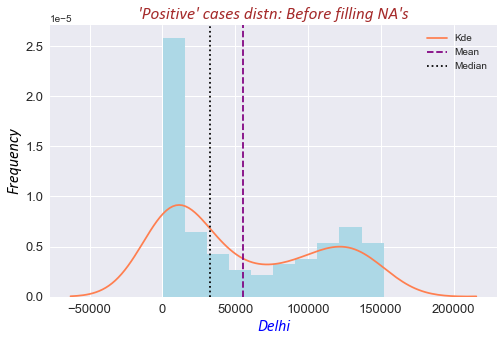

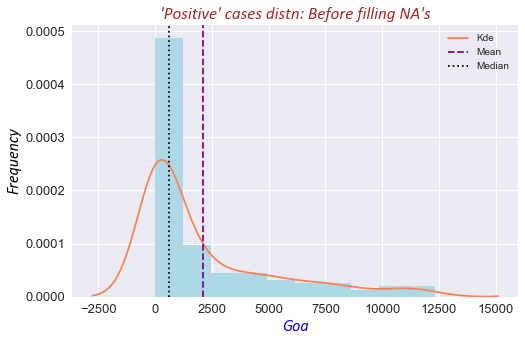

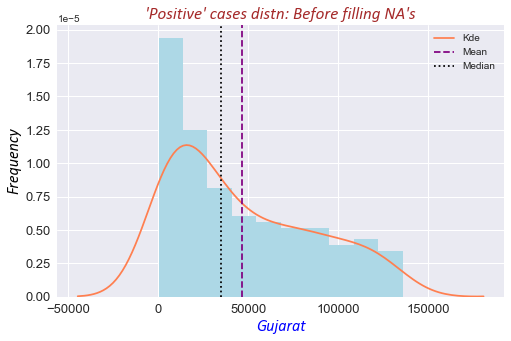

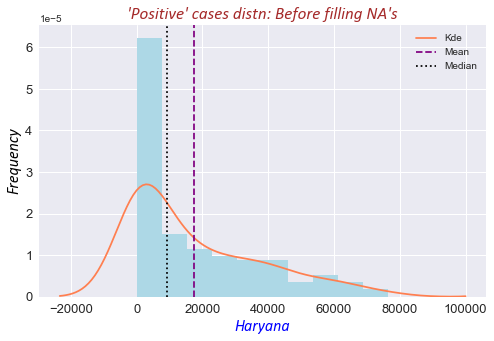

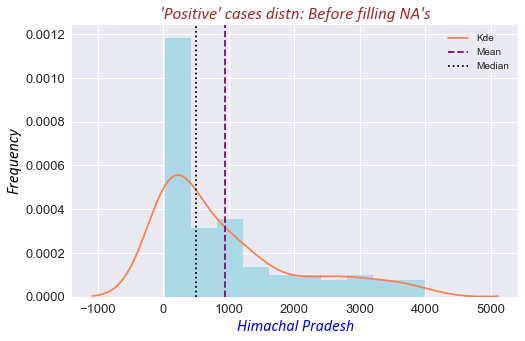

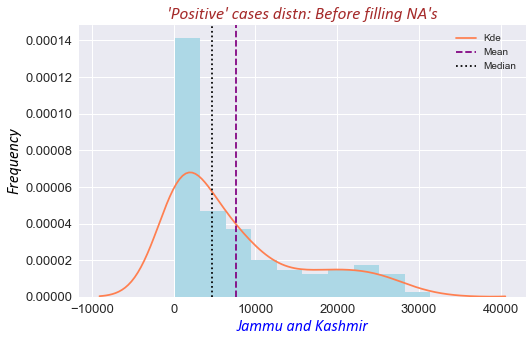

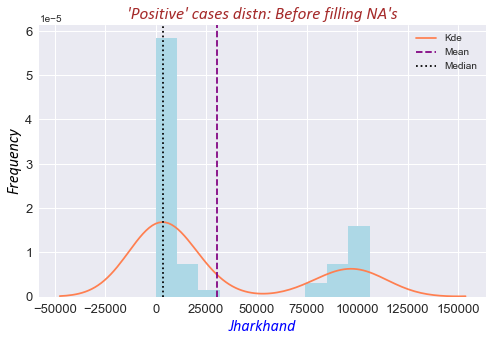

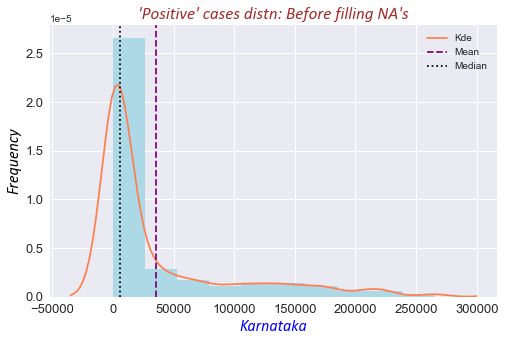

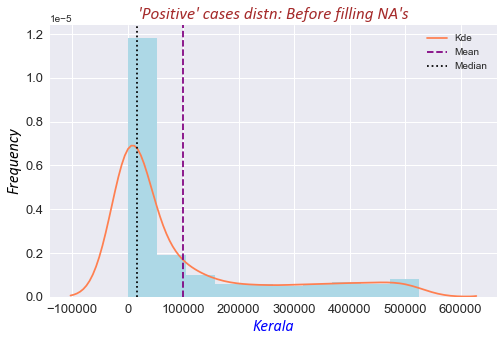

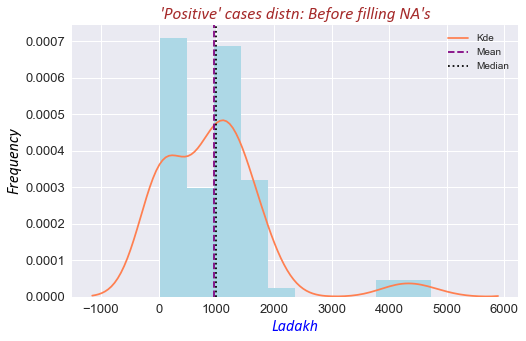

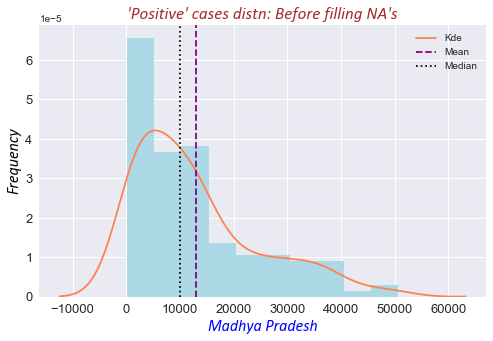

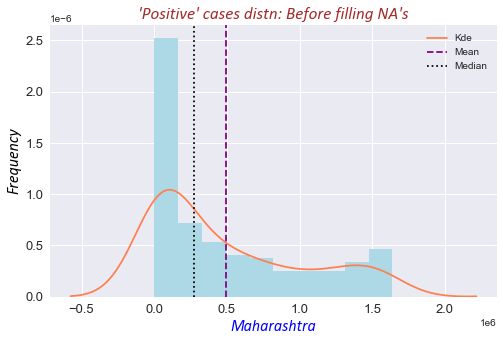

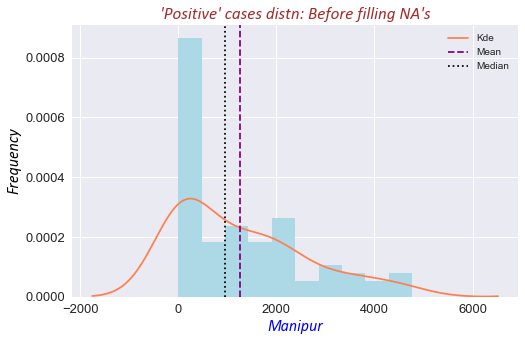

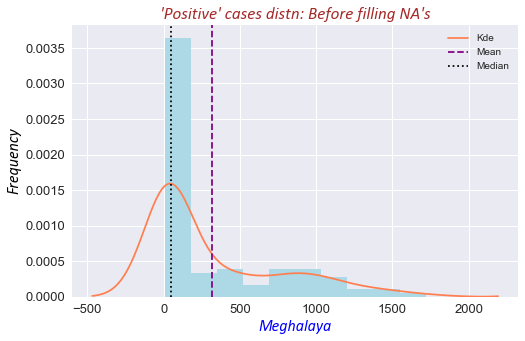

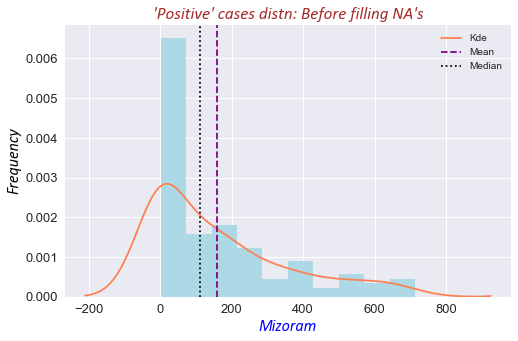

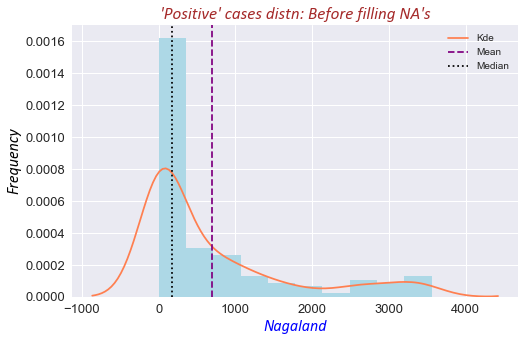

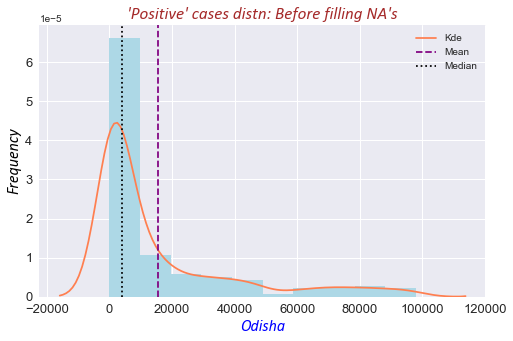

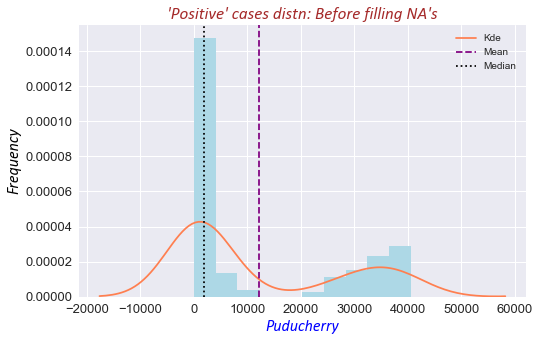

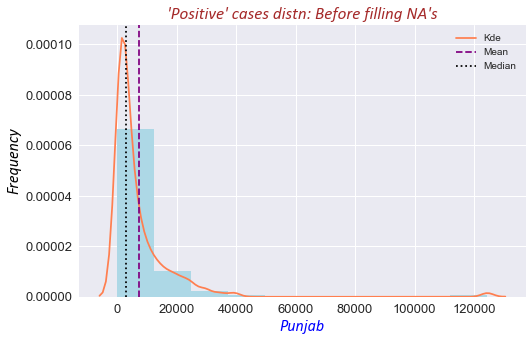

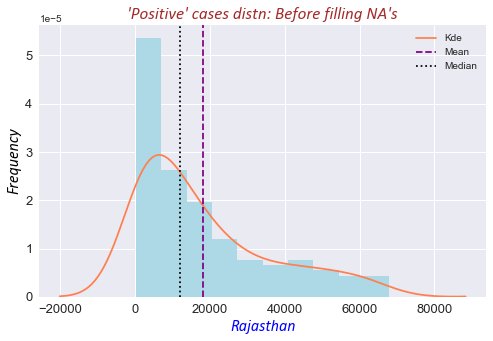

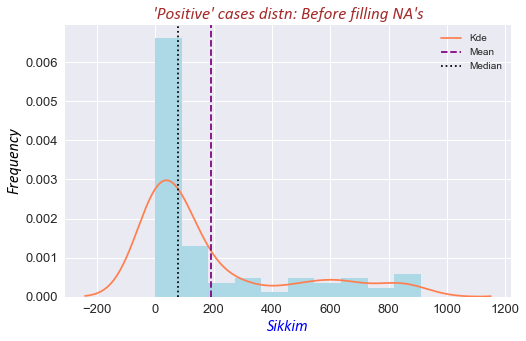

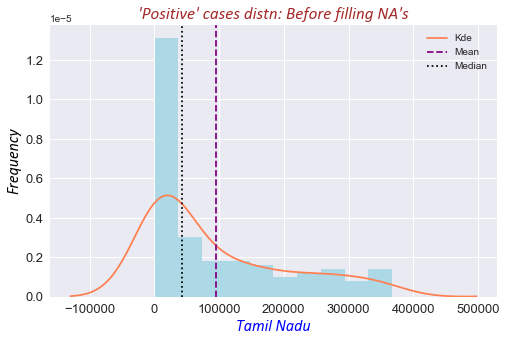

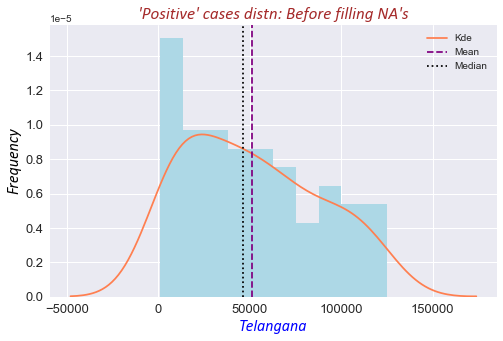

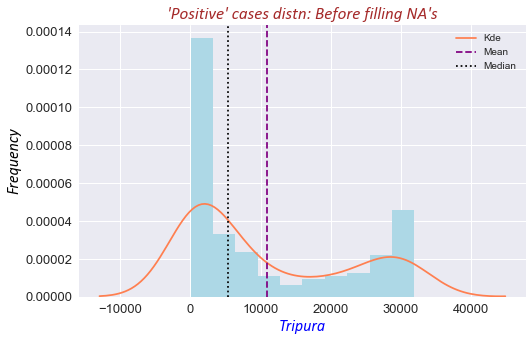

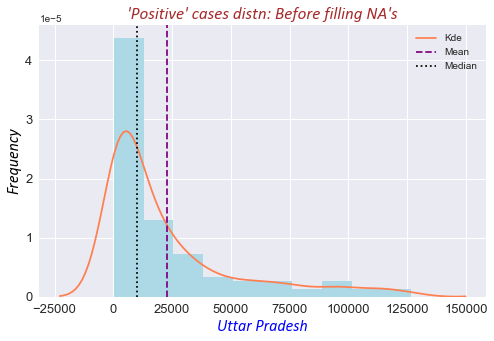

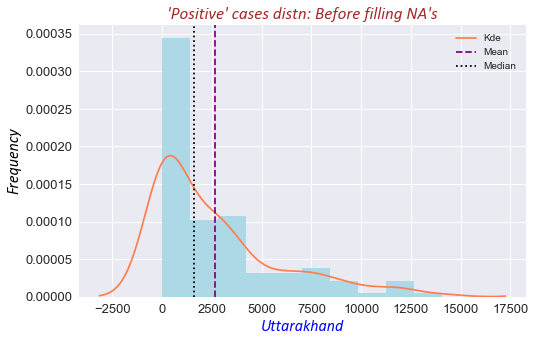

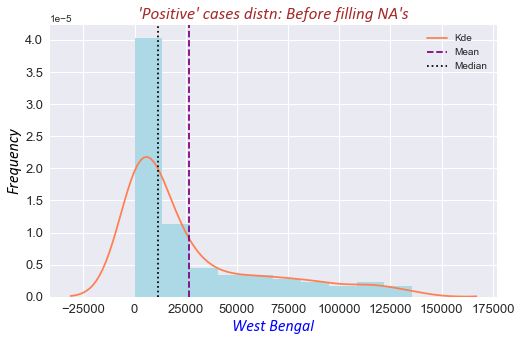

c:\users\rajsh\appdata\local\programs\python\python36\lib\site-packages\numpy\lib\histograms.py:908: RuntimeWarning: invalid value encountered in true_divide
  return n/db/n.sum(), bin_edges
c:\users\rajsh\appdata\local\programs\python\python36\lib\site-packages\seaborn\distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)


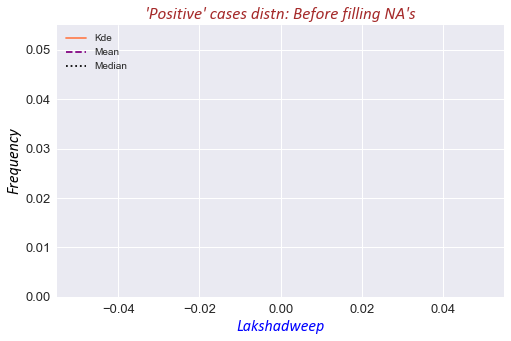

In [36]:
plot_hist_kde(pop_test_df,grp_by_col='State',dist_col='Positive',title="'Positive' cases distn: Before filling NA's")

##### **Imputing NULL values in 'Positive' statewise**
- **``By seeing the above distributions it seems like Median would be more suitable for replacing the NULL values``**

In [37]:
states_pop_median = pop_test_df.groupby(['State'])[['Positive']].median().reset_index().rename(columns={'Positive':'Pos_Median'})
states_pop_median['Pos_Median'].fillna(value=states_pop_median['Pos_Median'].median(),inplace=True)
states_pop_median

State  Pos_Median
0                Andaman and Nicobar Islands      2186.0
1                             Andhra Pradesh      4126.0
2                          Arunachal Pradesh       101.0
3                                      Assam      6067.5
4                                      Bihar      5695.0
5                                 Chandigarh       334.0
6                               Chhattisgarh      1905.0
7   Dadra and Nagar Haveli and Daman and Diu       495.0
8                                      Delhi     32810.0
9                                        Goa       629.0
10                                   Gujarat     34686.0
11                                   Haryana      9218.0
12                          Himachal Pradesh       489.5
13                         Jammu and Kashmir      4730.0
14                                 Jharkhand      3393.0
15                                 Karnataka      6041.0
16                                    Kerala     16996.0
17                                    Ladakh       990.0
18                               Lakshadweep      4109.0
19                            Madhya Pradesh      9949.0
20                               Maharashtra    276571.5
21                                   Manipur       945.5
22                                 Meghalaya        48.0
23                                   Mizoram       112.0
24                                  Nagaland       178.0
25                                    Odisha      4109.0
26                                Puducherry      1832.0
27                                    Punjab      2936.5
28                                 Rajasthan     12068.0
29                                    Sikkim        79.0
30                                Tamil Nadu     42687.0
31                                 Telangana     46274.0
32                                   Tripura      5389.0
33                             Uttar Pradesh     10103.0
34                               Uttarakhand      1598.5
35                               West Bengal     11290.5

In [38]:
pop_test_df['Positive'] = pop_test_df[['State','Positive']].apply(lambda row: np.float(states_pop_median[states_pop_median['State'] == row['State']]['Pos_Median']) \
                                        if str(row['Positive']).lower() == str('NaN').lower() else row['Positive'],axis=1)

In [39]:
pop_test_df

Date  TotalSamples Negative  Positive  \
0     2020-04-17        1403.0     1210      12.0   
1     2020-04-24        2679.0      NaN      27.0   
2     2020-04-27        2848.0      NaN      33.0   
3     2020-05-01        3754.0      NaN      33.0   
4     2020-05-16        6677.0      NaN      33.0   
...          ...           ...      ...       ...   
7308  2020-11-12     5091700.0      NaN   11290.5   
7309  2020-11-13     5136012.0      NaN   11290.5   
7310  2020-11-14     5180139.0      NaN   11290.5   
7311  2020-11-15     5218797.0      NaN   11290.5   
7312         NaN           NaN      NaN    4109.0   

                            State  Population  Rural population  \
0     Andaman and Nicobar Islands      380581            237093   
1     Andaman and Nicobar Islands      380581            237093   
2     Andaman and Nicobar Islands      380581            237093   
3     Andaman and Nicobar Islands      380581            237093   
4     Andaman and Nicobar Islands      380581            237093   
...                           ...         ...               ...   
7308                  West Bengal    91276115          62183113   
7309                  West Bengal    91276115          62183113   
7310                  West Bengal    91276115          62183113   
7311                  West Bengal    91276115          62183113   
7312                  Lakshadweep       64473             14141   

      Urban population                       Area                  Density  \
0               143488    8,249 km2 (3,185 sq mi)       46/km2 (120/sq mi)   
1               143488    8,249 km2 (3,185 sq mi)       46/km2 (120/sq mi)   
2               143488    8,249 km2 (3,185 sq mi)       46/km2 (120/sq mi)   
3               143488    8,249 km2 (3,185 sq mi)       46/km2 (120/sq mi)   
4               143488    8,249 km2 (3,185 sq mi)       46/km2 (120/sq mi)   
...                ...                        ...                      ...   
7308          29093002  88,752 km2 (34,267 sq mi)  1,029/km2 (2,670/sq mi)   
7309          29093002  88,752 km2 (34,267 sq mi)  1,029/km2 (2,670/sq mi)   
7310          29093002  88,752 km2 (34,267 sq mi)  1,029/km2 (2,670/sq mi)   
7311          29093002  88,752 km2 (34,267 sq mi)  1,029/km2 (2,670/sq mi)   
7312             50332          32 km2 (12 sq mi)  2,013/km2 (5,210/sq mi)   

      Gender Ratio  Density in km2 Dense_grp  
0              876            46.0    Dense1  
1              876            46.0    Dense1  
2              876            46.0    Dense1  
3              876            46.0    Dense1  
4              876            46.0    Dense1  
...            ...             ...       ...  
7308           953          1029.0    Dense4  
7309           953          1029.0    Dense4  
7310           953          1029.0    Dense4  
7311           953          1029.0    Dense4  
7312           946          2013.0    Dense5  

[7313 rows x 13 columns]

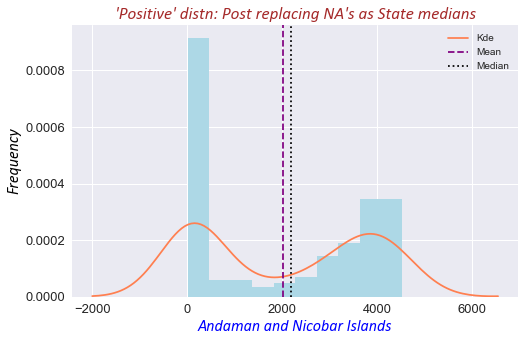

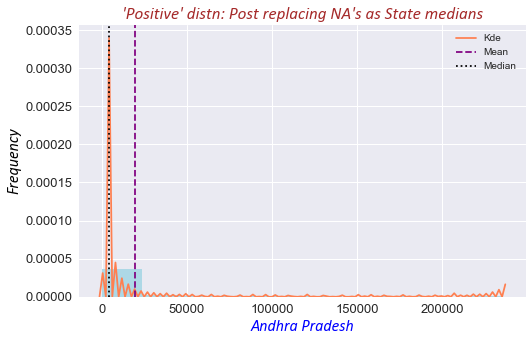

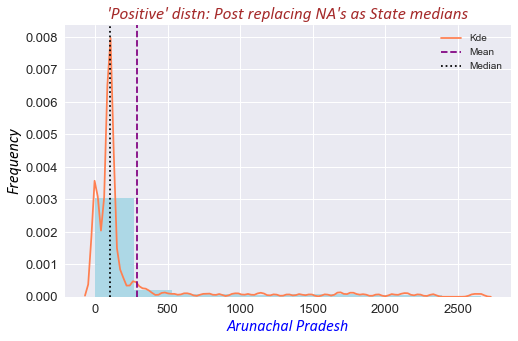

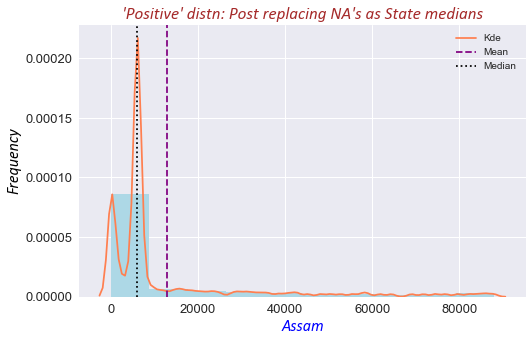

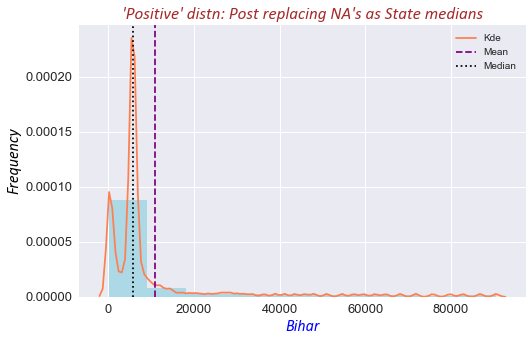

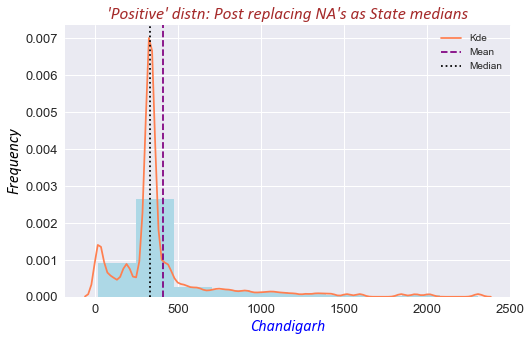

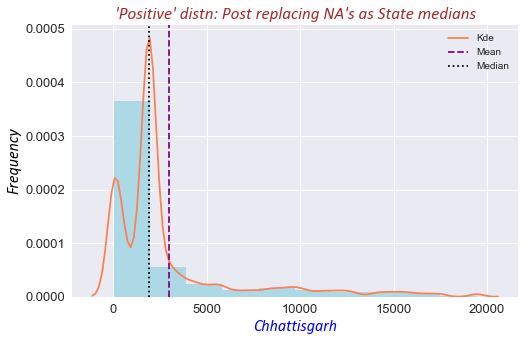

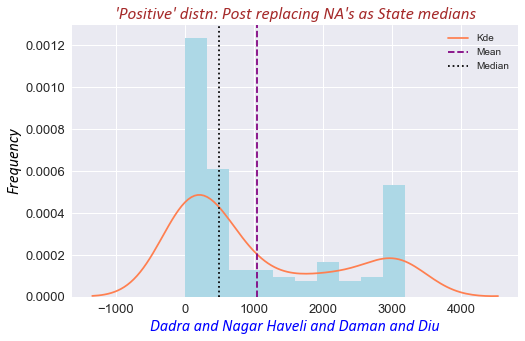

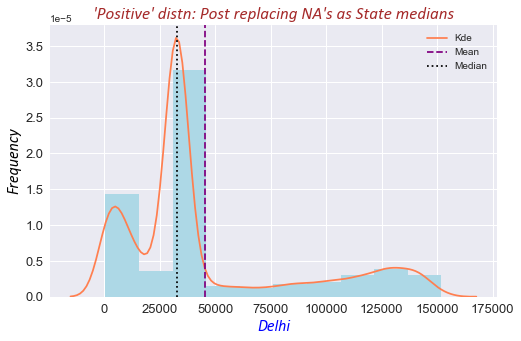

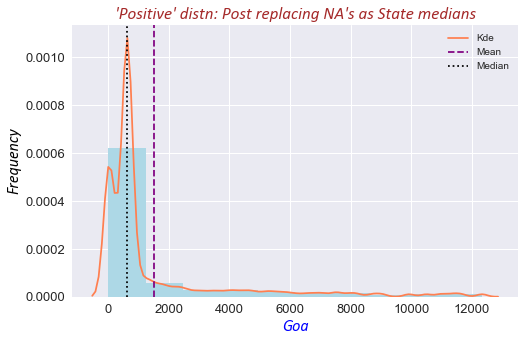

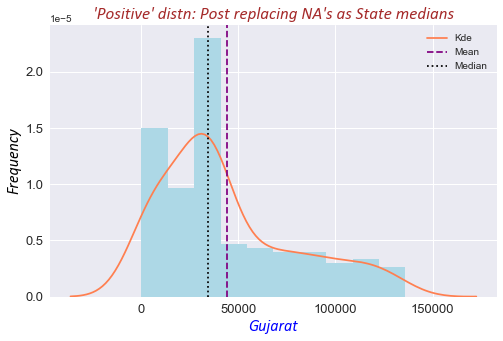

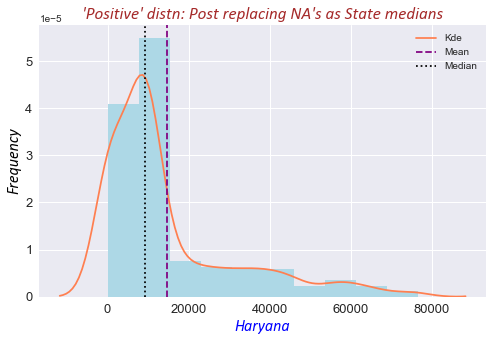

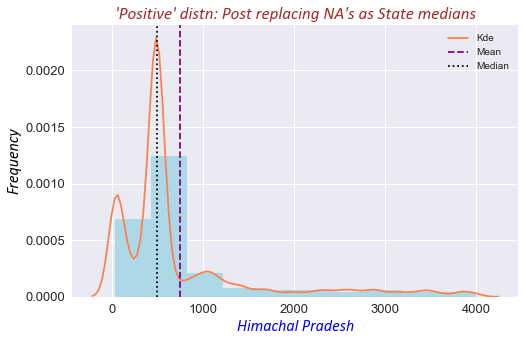

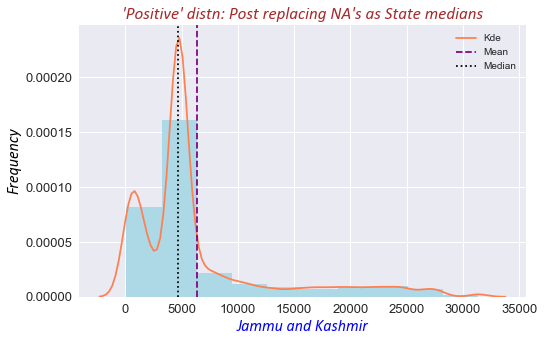

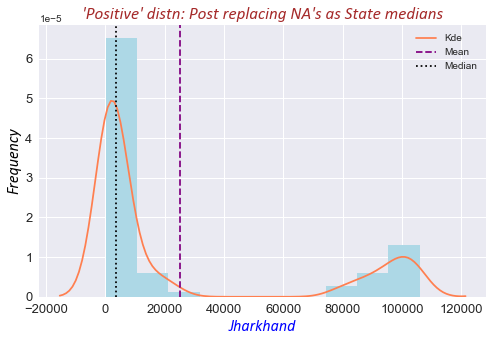

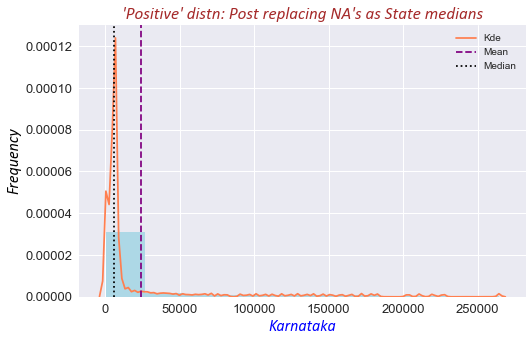

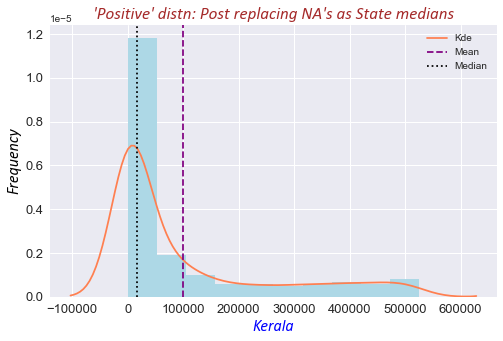

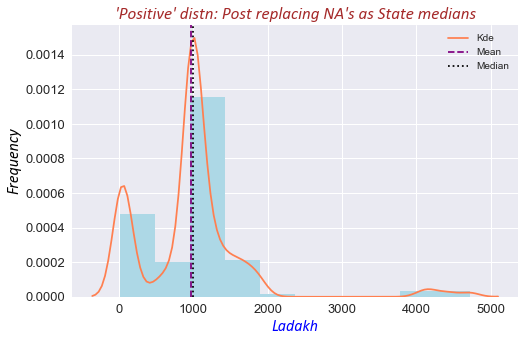

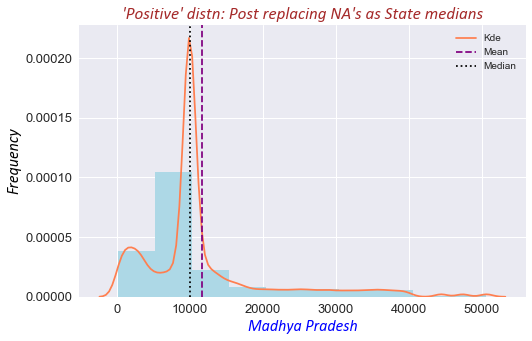

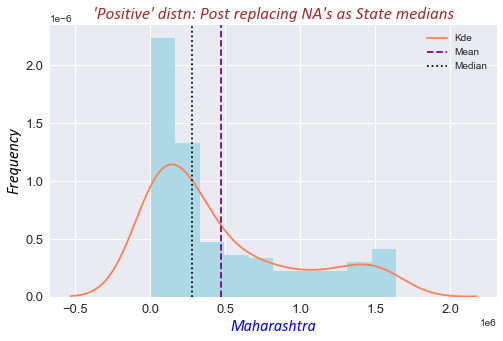

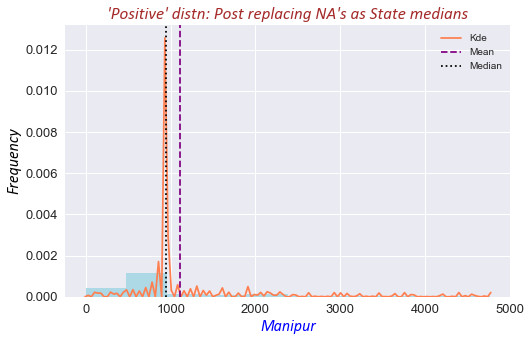

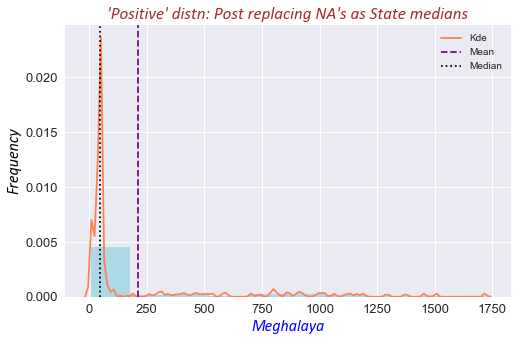

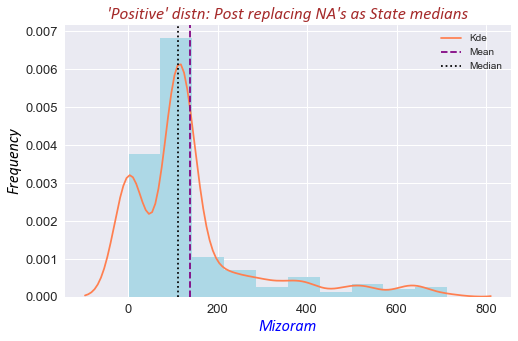

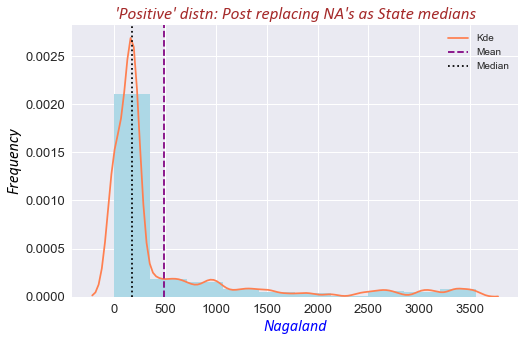

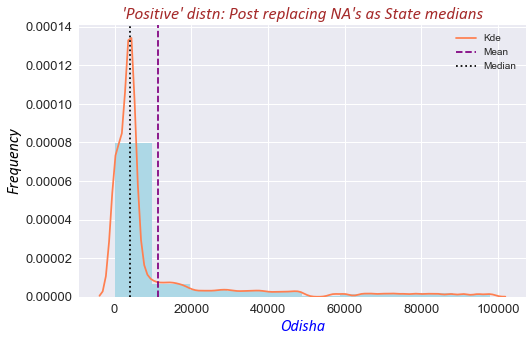

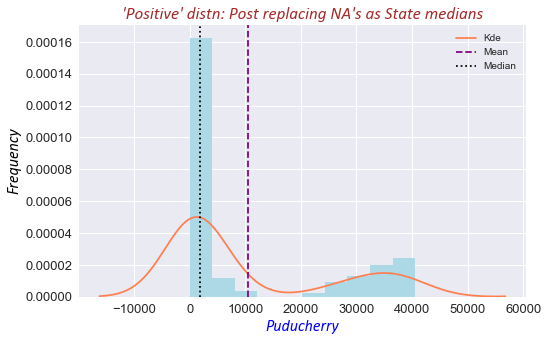

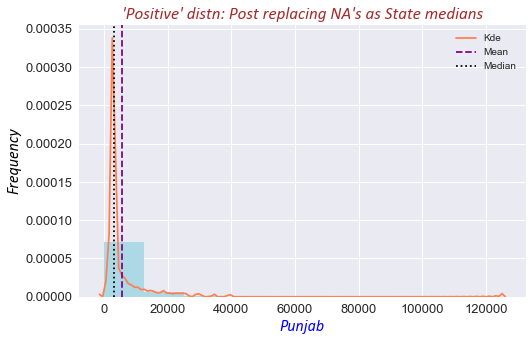

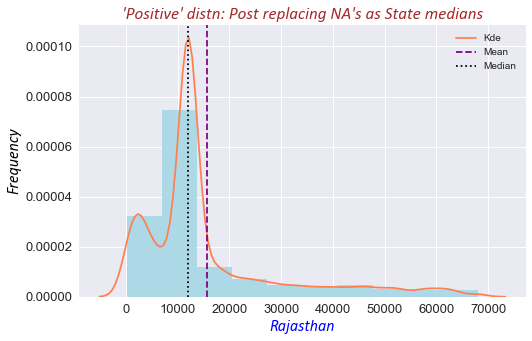

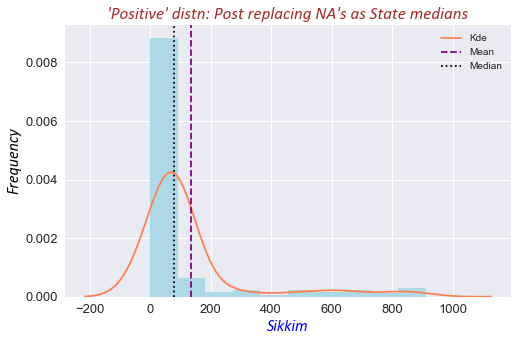

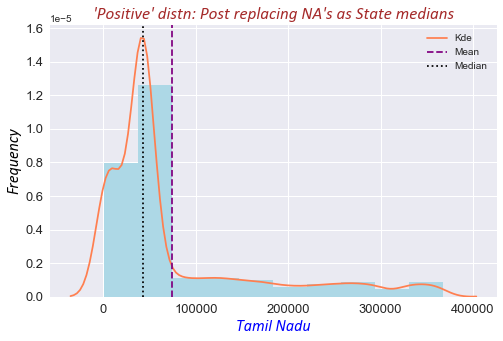

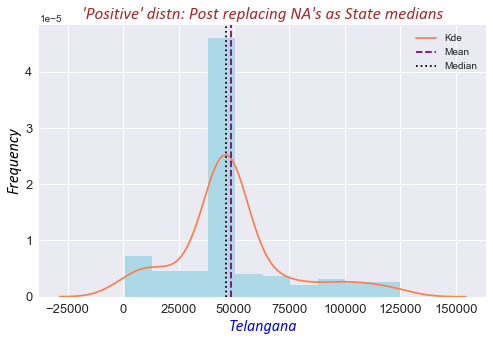

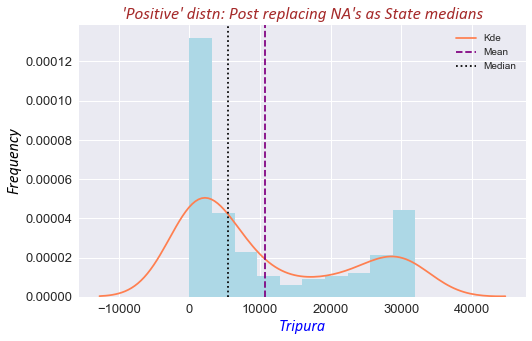

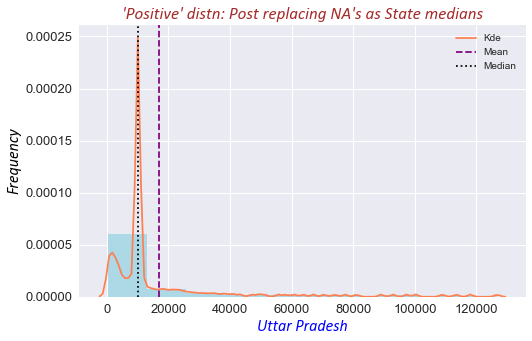

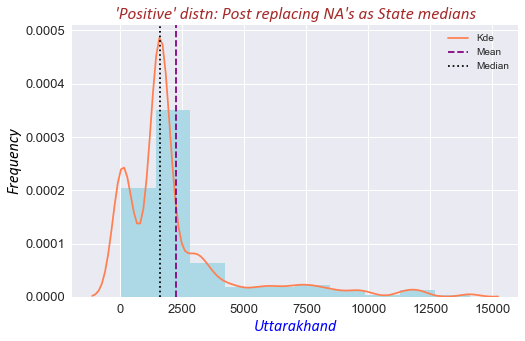

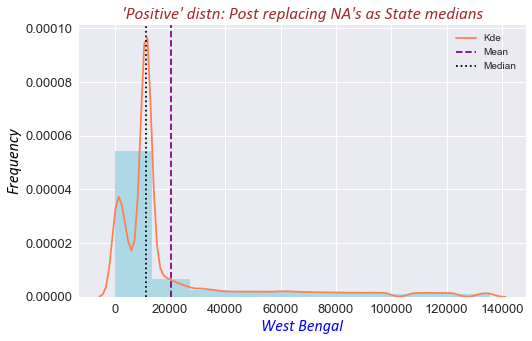

c:\users\rajsh\appdata\local\programs\python\python36\lib\site-packages\seaborn\distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)


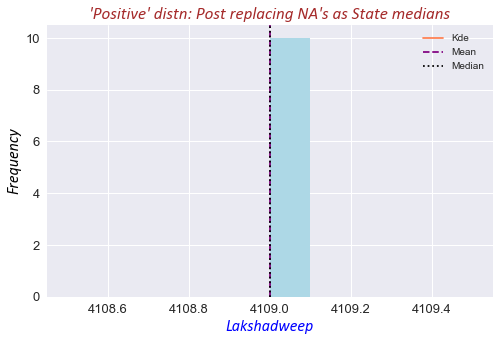

In [40]:
plot_hist_kde(pop_test_df,grp_by_col='State',dist_col='Positive',title="'Positive' distn: Post replacing NA's as State medians")

##### **Overall Distribution of ``Positive`` cases**

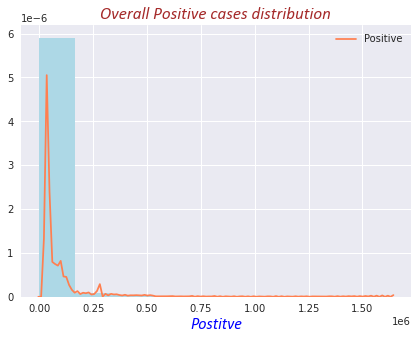

In [41]:
with plt.style.context('seaborn'):
    plt.figure(figsize=(7,5))
    plt.hist(pop_test_df['Positive'],density=True,color='lightblue')
    sns.kdeplot(data=pop_test_df['Positive'],color='coral')
    plt.xlabel("Postitve",fontdict=font_dicts(kind='xlabel'))
    plt.title("Overall Positive cases distribution",fontdict=font_dicts(kind="title"));

##### **By seeing the above distribution, the first impression looks like 'Positive' follows the Power-Rule thus apply the PowerTransformer.** 

In [42]:
from sklearn.preprocessing import PowerTransformer

In [43]:
pt = PowerTransformer(method='yeo-johnson')

##### **Here, in the power transformer I have selected the method as ``'yeo-johnson'`` because ``'box-cox'`` strictly deals with positive values and it looks for the minimum value in the array should be grater than 0. However, in the ``'Positive'`` array the minimum value is 0, therefore going ahead with ``'yeo-johnson'``.**

##### **Checking the sign of values (-1 for negative, 1 for positive and 0 for 0)**

In [44]:
aa = pd.DataFrame(np.sign(pop_test_df['Positive']))
aa[aa.Positive==0]

Positive
1472       0.0
1473       0.0
1474       0.0
1475       0.0
1476       0.0
...        ...
5883       0.0
5884       0.0
5885       0.0
5886       0.0
5887       0.0

[77 rows x 1 columns]

##### **Minimum value in the array after ignoring NAN's**

In [45]:
np.nanmin(pop_test_df['Positive'])

0.0

In [46]:
annv1_dense_grp = pop_test_df[['Positive','Dense_grp']].iloc[0:-1,:].drop_duplicates().reset_index(drop=True)
annv1_dense_grp.shape

(3976, 2)

In [47]:
annv1_dense_grp['Positive'].isna().sum()

0

In [48]:
from sklearn.preprocessing import StandardScaler

In [49]:
ss=StandardScaler()

In [50]:
annv1_dense_grp = pd.concat([annv1_dense_grp,pd.DataFrame(ss.fit_transform(pd.DataFrame(scipy.stats.yeojohnson(annv1_dense_grp['Positive'],lmbda=None)[0])[[0]]),columns=['positive_pt'])],axis=1)

In [51]:
#annv1_dense_grp = pd.concat([annv1_dense_grp,pd.DataFrame(pt.fit_transform(annv1_dense_grp[['Positive']]),columns=['positive_pt'])],axis=1)

In [52]:
annv1_dense_grp

Positive Dense_grp  positive_pt
0         12.0    Dense1    -2.434070
1         27.0    Dense1    -2.135350
2         33.0    Dense1    -2.059129
3         35.0    Dense1    -2.036642
4         38.0    Dense1    -2.005114
...        ...       ...          ...
3971  116498.0    Dense4     1.376988
3972  119578.0    Dense4     1.388798
3973  122753.0    Dense4     1.400664
3974  132364.0    Dense4     1.434825
3975  135596.0    Dense4     1.445767

[3976 rows x 3 columns]

In [53]:
pt_dense_grp1 = pd.DataFrame(annv1_dense_grp[annv1_dense_grp['Dense_grp']=='Dense1']['positive_pt']).rename(columns={'positive_pt':'pos_pt_dense1'})
pt_dense_grp2 = pd.DataFrame(annv1_dense_grp[annv1_dense_grp['Dense_grp']=='Dense2']['positive_pt']).rename(columns={'positive_pt':'pos_pt_dense2'})
pt_dense_grp3 = pd.DataFrame(annv1_dense_grp[annv1_dense_grp['Dense_grp']=='Dense3']['positive_pt']).rename(columns={'positive_pt':'pos_pt_dense3'})
pt_dense_grp4 = pd.DataFrame(annv1_dense_grp[annv1_dense_grp['Dense_grp']=='Dense4']['positive_pt']).rename(columns={'positive_pt':'pos_pt_dense4'})
pt_dense_grp5 = pd.DataFrame(annv1_dense_grp[annv1_dense_grp['Dense_grp']=='Dense5']['positive_pt']).rename(columns={'positive_pt':'pos_pt_dense5'})

##### **Check if any NAN's exist post Power Transformation**

In [54]:
pd.DataFrame({'Grp1':[pt_dense_grp1['pos_pt_dense1'].isna().sum()],
              'Grp2':[pt_dense_grp2['pos_pt_dense2'].isna().sum()],
              'Grp3':[pt_dense_grp3['pos_pt_dense3'].isna().sum()],
              'Grp4':[pt_dense_grp4['pos_pt_dense4'].isna().sum()],
              'Grp5':[pt_dense_grp5['pos_pt_dense5'].isna().sum()]})

Grp1  Grp2  Grp3  Grp4  Grp5
0     0     0     0     0     0

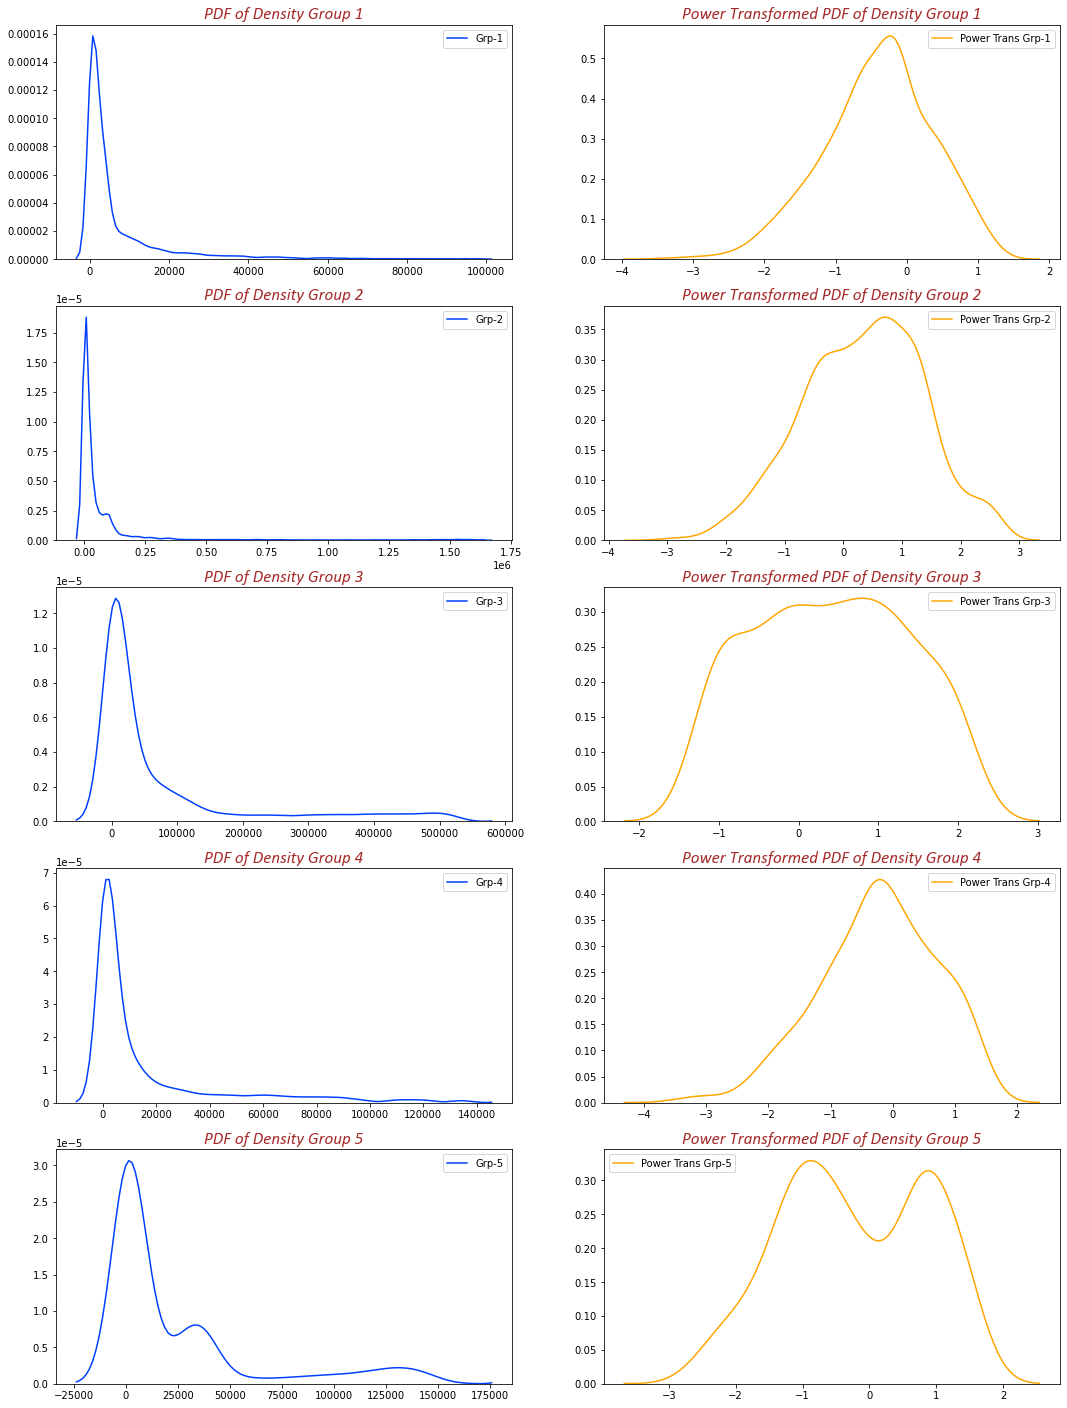

In [55]:
with plt.style.context('seaborn-bright'):
    fig , ax = plt.subplots(nrows=5,ncols=2,figsize=(18,25))
    sns.kdeplot(annv1_dense_grp[annv1_dense_grp['Dense_grp']=='Dense1']['Positive'],ax=ax[0,0],label='Grp-1')
    sns.kdeplot(pt_dense_grp1['pos_pt_dense1'],ax=ax[0,1],label='Power Trans Grp-1',color='orange')
    ax[0,0].set_title('PDF of Density Group 1',fontdict=font_dicts(kind='title'))
    ax[0,1].set_title('Power Transformed PDF of Density Group 1',fontdict=font_dicts(kind='title'))
    
    sns.kdeplot(annv1_dense_grp[annv1_dense_grp['Dense_grp']=='Dense2']['Positive'],ax=ax[1,0],label='Grp-2')
    sns.kdeplot(pt_dense_grp2['pos_pt_dense2'],ax=ax[1,1],label='Power Trans Grp-2',color='orange')
    ax[1,0].set_title('PDF of Density Group 2',fontdict=font_dicts(kind='title'))
    ax[1,1].set_title('Power Transformed PDF of Density Group 2',fontdict=font_dicts(kind='title'))
    
    sns.kdeplot(annv1_dense_grp[annv1_dense_grp['Dense_grp']=='Dense3']['Positive'],ax=ax[2,0],label='Grp-3')
    sns.kdeplot(pt_dense_grp3['pos_pt_dense3'],ax=ax[2,1],label='Power Trans Grp-3',color='orange')
    ax[2,0].set_title('PDF of Density Group 3',fontdict=font_dicts(kind='title'))
    ax[2,1].set_title('Power Transformed PDF of Density Group 3',fontdict=font_dicts(kind='title'))
    
    sns.kdeplot(annv1_dense_grp[annv1_dense_grp['Dense_grp']=='Dense4']['Positive'],ax=ax[3,0],label='Grp-4')
    sns.kdeplot(pt_dense_grp4['pos_pt_dense4'],ax=ax[3,1],label='Power Trans Grp-4',color='orange')
    ax[3,0].set_title('PDF of Density Group 4',fontdict=font_dicts(kind='title'))
    ax[3,1].set_title('Power Transformed PDF of Density Group 4',fontdict=font_dicts(kind='title'))
    
    sns.kdeplot(annv1_dense_grp[annv1_dense_grp['Dense_grp']=='Dense5']['Positive'],ax=ax[4,0],label='Grp-5')
    sns.kdeplot(pt_dense_grp5['pos_pt_dense5'],ax=ax[4,1],label='Power Trans Grp-5',color='orange')
    ax[4,0].set_title('PDF of Density Group 5',fontdict=font_dicts(kind='title'))
    ax[4,1].set_title('Power Transformed PDF of Density Group 5',fontdict=font_dicts(kind='title'))

In [56]:
all_states_pt_pos = pd.DataFrame(pd.concat([pt_dense_grp1['pos_pt_dense1'],
                               pt_dense_grp2['pos_pt_dense2'],
                               pt_dense_grp3['pos_pt_dense3'],
                               pt_dense_grp4['pos_pt_dense4'],
                               pt_dense_grp5['pos_pt_dense5']],axis=0),columns=['positive_pt'])

all_states_pt_pos['positive_pt']

0      -2.434070
1      -2.135350
2      -2.059129
3      -2.036642
4      -2.005114
          ...   
2997    0.901550
2998    0.902276
2999    0.903100
3000    0.903626
3001    0.903900
Name: positive_pt, Length: 3976, dtype: float64

In [57]:
all_states_pt_pos['positive_pt'].isna().sum()

0

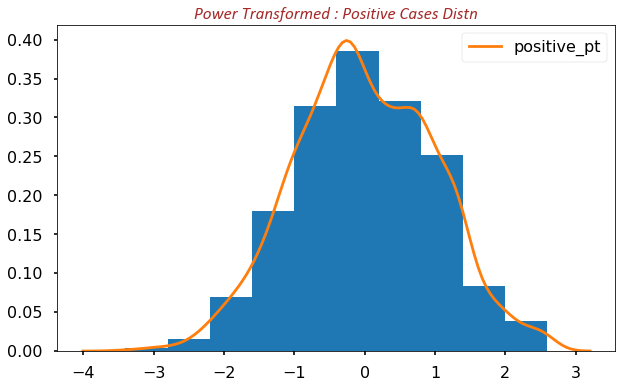

In [58]:
with plt.style.context('seaborn-poster'):
    plt.figure(figsize=(10,6))
    plt.hist(all_states_pt_pos['positive_pt'] ,density=True)
    sns.kdeplot(data=all_states_pt_pos['positive_pt'],bw='scott')
    plt.title("Power Transformed : Positive Cases Distn",fontdict=font_dicts(kind='title'))

##### **Here, it is not a perfect Gaussian or Normal Bell Curve and despite having some deviations on both the tails, overall we can say that it is a normal distribution.**

In [59]:
scipy.stats.skew(all_states_pt_pos['positive_pt'],bias=False)

-0.003036158234518849

In [60]:
scipy.stats.skewtest(all_states_pt_pos['positive_pt'])

SkewtestResult(statistic=-0.07827477685213896, pvalue=0.9376094810463458)

In [61]:
scipy.stats.kurtosis(all_states_pt_pos['positive_pt'],bias=False)

-0.23000557248373132

In [62]:
scipy.stats.kurtosistest(all_states_pt_pos['positive_pt'])

KurtosistestResult(statistic=-3.3224770370815593, pvalue=0.0008922201469807335)

##### **Let's Run some ``Normality Tests`` on the entire Power Transformed 'Positive' feature**

##### **Shapiro-Wilk Test**

In [63]:
scipy.stats.shapiro(all_states_pt_pos['positive_pt'])

ShapiroResult(statistic=0.9976674318313599, pvalue=9.815064004214946e-06)

##### **The number of records are 4000 therefore, we can run Shapiro-Wilk test because it works pretty well with the record size less than 5K. And, the p-value is highly significant that suggests that it doesn't follow the normal distribution.**

##### **Anderson-Darling Test**

In [64]:
scipy.stats.anderson(all_states_pt_pos['positive_pt'])

AndersonResult(statistic=2.652252075263732, critical_values=array([0.575, 0.655, 0.786, 0.917, 1.091]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))

##### **Anderson-Darling test is the much improved version of KS test and it eliminates the major limitation of sensitivity near the center of the distribution than at the tails. Here, we are 99% confident that it doesn't belongs to a normal distribution.**

##### **D-Agostino Test**

In [65]:
scipy.stats.normaltest(all_states_pt_pos['positive_pt'])

NormaltestResult(statistic=11.04498060262551, pvalue=0.003995884584731554)

##### **Anderson-Darling and Agostino both are powerful normality tests and gives us the highly significant results.** 

##### **QQ Plot**

In [66]:
from statsmodels.api import ProbPlot

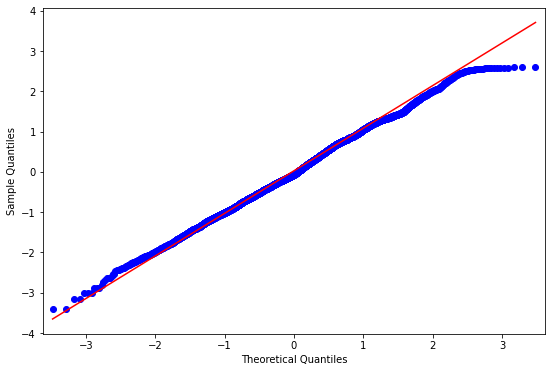

In [67]:
with plt.style.context('seaborn-bright'):
    fig, ax = plt.subplots(nrows=1,ncols=1,figsize=(9,6))
    stm.graphics.gofplots.qqplot(all_states_pt_pos['positive_pt'],ax=ax,line='q')

### **Majority of the points are following the straight line with a few deviations at the ends. However, the tests have told us that it doesn't belong to a normal distribution.**

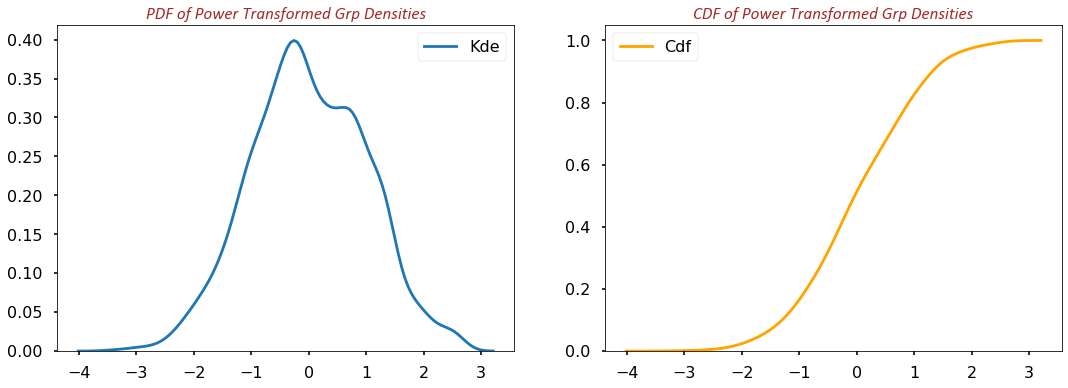

In [68]:
with plt.style.context('seaborn-poster'):
    fig, ax = plt.subplots(nrows=1,ncols=2,figsize=(18,6))
    sns.kdeplot(all_states_pt_pos['positive_pt'],label='Kde',ax=ax[0],bw='scott')
    ax[0].set_title('PDF of Power Transformed Grp Densities',fontdict=font_dicts(kind='title'))
    sns.kdeplot(all_states_pt_pos['positive_pt'],cumulative=True,label='Cdf',color='orange',ax=ax[1])
    ax[1].set_title('CDF of Power Transformed Grp Densities',fontdict=font_dicts(kind='title'))
    plt.show()

### **Although Normality tests have given highly statistically significant results but graphically(QQ, KDE and CDF plots) speaking it might not be a perfect gaussian like distribution but a slightly non-normal data that can be put in the bucket of normal distributions. Because nothing can be completely normal and when the data increases normaliity tests gives everything as significant means non-normal. Majority of the time Scientists also consider slightly non-normal data as normal.**

### **Or, if you want to move away from Normality assumption then either use Resampling/bootstrapping or non-parametric tests.**

#### **Reference Links**

https://stats.stackexchange.com/questions/284033/qq-plot-looks-normal-but-shapiro-wilk-test-says-otherwise

https://stats.stackexchange.com/questions/2492/is-normality-testing-essentially-useless

https://stats.stackexchange.com/questions/99621/should-the-shapiro-wilk-test-and-qq-plot-always-be-combined/99622#99622

##### **Lillifers Test**

In [69]:
np.round(np.mean(all_states_pt_pos['positive_pt']),3), np.round(np.std(all_states_pt_pos['positive_pt']),3)

(-0.0, 1.0)

In [70]:
from statsmodels.stats.diagnostic import lilliefors  ## It is a Kolmogorov-Smirnov Test with estimated parameters

lilliefors(all_states_pt_pos['positive_pt'],dist='norm')

(0.025661731372888796, 0.0009999999999998899)

##### **Kolmogorov Smirnov Test**

In [71]:
np.round(np.mean(all_states_pt_pos['positive_pt']),3), np.round(np.std(all_states_pt_pos['positive_pt']),3)

(-0.0, 1.0)

In [72]:
scipy.stats.kstest(all_states_pt_pos['positive_pt'],cdf='norm',mode='auto')

KstestResult(statistic=0.025663976892299267, pvalue=0.010441759115162142)

##### **Majority of the tests have suggested that it's not following a normal distribution.**

##### **Will also conduct these tests on the model residuals and will look for the ANOVA assumption of Normality and Equal variances among the groups.**

##### **Let's first perform the ANOVA test for verifying the difference in means then perform the Non-parametric Kruskal-Wallis test.**

#### **``Running One-Way ANOVA``**

In [73]:
scipy.stats.f_oneway(pt_dense_grp1['pos_pt_dense1'],
                     pt_dense_grp2['pos_pt_dense2'],
                     pt_dense_grp3['pos_pt_dense3'],
                     pt_dense_grp4['pos_pt_dense4'],
                     pt_dense_grp5['pos_pt_dense5'])

F_onewayResult(statistic=137.43244292966435, pvalue=3.834952237442604e-110)

In [74]:
grp_pos_cases = pd.DataFrame({'Dense1':pt_dense_grp1['pos_pt_dense1'],
                              'Dense2':pt_dense_grp2['pos_pt_dense2'],
                              'Dense3':pt_dense_grp3['pos_pt_dense3'],
                              'Dense4':pt_dense_grp4['pos_pt_dense4'],
                              'Dense5':pt_dense_grp5['pos_pt_dense5']})

In [75]:
grp_pos_cases

Dense1  Dense2  Dense3    Dense4  Dense5
0    -2.434070     NaN     NaN       NaN     NaN
1    -2.135350     NaN     NaN       NaN     NaN
2    -2.059129     NaN     NaN       NaN     NaN
3    -2.036642     NaN     NaN       NaN     NaN
4    -2.005114     NaN     NaN       NaN     NaN
...        ...     ...     ...       ...     ...
3971       NaN     NaN     NaN  1.376988     NaN
3972       NaN     NaN     NaN  1.388798     NaN
3973       NaN     NaN     NaN  1.400664     NaN
3974       NaN     NaN     NaN  1.434825     NaN
3975       NaN     NaN     NaN  1.445767     NaN

[3976 rows x 5 columns]

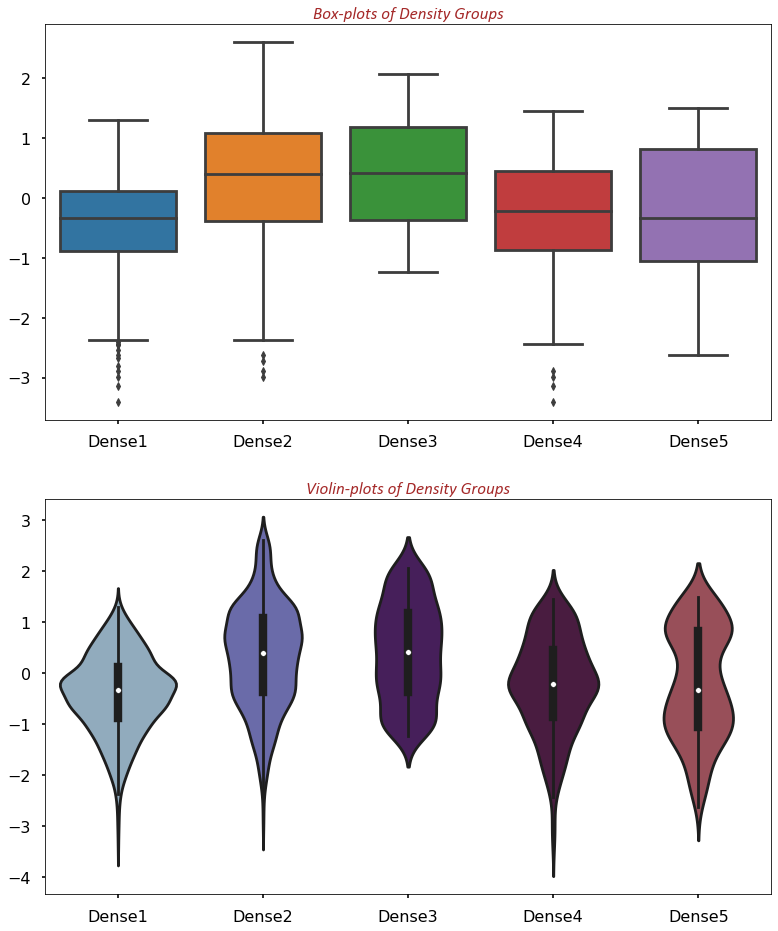

In [76]:
with plt.style.context('seaborn-poster'):
    fig, ax = plt.subplots(nrows=2,ncols=1,figsize=(13,16))
    sns.boxplot(data=grp_pos_cases,ax=ax[0])
    ax[0].set_title("Box-plots of Density Groups",fontdict=font_dicts(kind='title'))
    sns.violinplot(data=grp_pos_cases,ax=ax[1],palette=sns.color_palette('twilight'))
    ax[1].set_title("Violin-plots of Density Groups",fontdict=font_dicts(kind='title'))

In [77]:
grp_pos_cases_melt = pd.melt(frame=grp_pos_cases.reset_index(),id_vars='index',value_vars=grp_pos_cases.columns,var_name='Dense_Grps',value_name='Positive').dropna().reset_index(drop=True).drop(columns=['index'],axis=1).reset_index()
grp_pos_cases_melt.head()

index Dense_Grps  Positive
0      0     Dense1 -2.434070
1      1     Dense1 -2.135350
2      2     Dense1 -2.059129
3      3     Dense1 -2.036642
4      4     Dense1 -2.005114

In [78]:
from statsmodels.formula.api import ols
from statsmodels.stats.api import anova_lm

In [79]:
dense_grp_model = ols('Positive ~ C(Dense_Grps)',data=grp_pos_cases_melt).fit()

In [80]:
dense_grp_model_anova_table = anova_lm(dense_grp_model,robust='hc3',typ='I')
dense_grp_model_anova_table

df       sum_sq     mean_sq           F         PR(>F)
C(Dense_Grps)     4.0   483.489543  120.872386  137.432443  3.834952e-110
Residual       3971.0  3492.510457    0.879504         NaN            NaN

In [81]:
dense_grps_f = scipy.stats.f(dense_grp_model_anova_table['df'][0],dense_grp_model_anova_table['df'][1])
dense_grp_model_anova_table['alpha'] = [0.05,None]
dense_grp_model_anova_table['F_crit'] = [dense_grps_f.ppf(0.95),None]
dense_grp_model_anova_table

df       sum_sq     mean_sq           F         PR(>F)  \
C(Dense_Grps)     4.0   483.489543  120.872386  137.432443  3.834952e-110   
Residual       3971.0  3492.510457    0.879504         NaN            NaN   

               alpha   F_crit  
C(Dense_Grps)   0.05  2.37417  
Residual         NaN      NaN

##### **So, here it becomes quite evident that Null Hypothesis has been rejected by a great margin as there is a huge difference in the Critical value and Test Statistic. Thus, we can say that means of the groups varying alot.**

In [82]:
dense_grp_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Positive   R-squared:                       0.122
Model:                            OLS   Adj. R-squared:                  0.121
Method:                 Least Squares   F-statistic:                     137.4
Date:                Thu, 26 Nov 2020   Prob (F-statistic):          3.83e-110
Time:                        01:18:26   Log-Likelihood:                -5383.9
No. Observations:                3976   AIC:                         1.078e+04
Df Residuals:                    3971   BIC:                         1.081e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                  -0.4036      0.026    -15.373      0.000      -0.455      -0.352
C(Dense_Grps)[T.Dense2]     0.7416      0.035     21.096      0.000       0.673       0.811
C(Dense_Grps)[T.Dense3]     0.8035      0.057     14.088      0.000       0.692       0.915
C(Dense_Grps)[T.Dense4]     0.1729      0.056      3.103      0.002       0.064       0.282
C(Dense_Grps)[T.Dense5]     0.1897      0.055      3.476      0.001       0.083       0.297
==============================================================================
Omnibus:                       40.304   Durbin-Watson:                   0.094
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               37.461
Skew:                          -0.199   Prob(JB):                     7.34e-09
Kurtosis:                       2.741   Cond. No.                         5.40
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [83]:
dense_grp_resid = dense_grp_model.resid

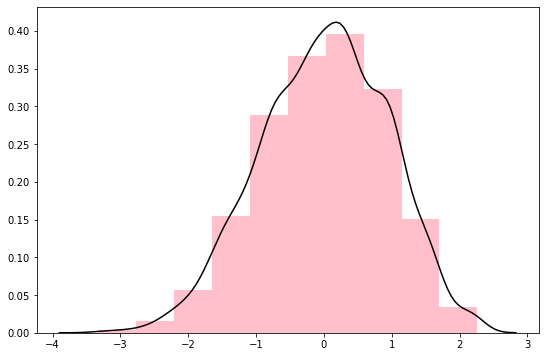

In [84]:
with plt.style.context('seaborn-bright'):
    fig, ax = plt.subplots(nrows=1,ncols=1,figsize=(9,6))
    plt.hist(dense_grp_resid,density=True,color='pink')
    sns.kdeplot(dense_grp_resid,ax=ax,color='black')

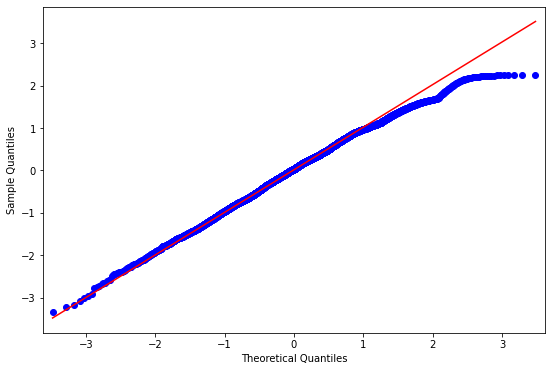

In [85]:
with plt.style.context('seaborn-bright'):
    fig, ax = plt.subplots(nrows=1,ncols=1,figsize=(9,6))
    stm.graphics.gofplots.qqplot(dense_grp_resid,ax=ax,line='q')

##### **Post-Hoc Tukey's HSD Test**

In [86]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd as tukeyhsd

In [87]:
post_hoc_results = tukeyhsd(grp_pos_cases_melt['Positive'],groups=grp_pos_cases_melt['Dense_Grps'])

In [88]:
post_hoc_results.summary()

<class 'statsmodels.iolib.table.SimpleTable'>

c:\users\rajsh\appdata\local\programs\python\python36\lib\site-packages\statsmodels\sandbox\stats\multicomp.py:775: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_yticklabels(np.insert(self.groupsunique.astype(str), 0, ''))


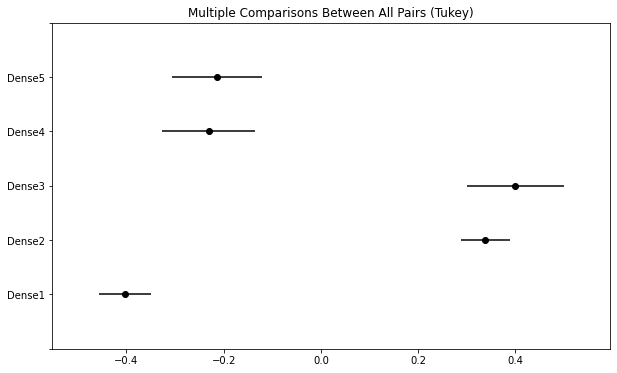

In [89]:
post_hoc_results.plot_simultaneous();

In [90]:
dense_grps_grand_mean = np.mean(grp_pos_cases.describe().loc['mean'])

In [91]:
def marginal_row_mean_plot(df,grand_mean,row1=False,row2=False,row3=False,row4=False,row5=False,row6=False):
    """
    Description: This function is created for plotting the marginal mean graph of a dataset having at most 6 groups or columns.
    
    Input parameter:
        1. df : DataFrame having treatment or group data
        2. grand_mean : Overall mean of groups or str
        3. row1 : Row or Block 1 or str
        4. row2 : Row or Block 2 or str
        5. row3 : Row or Block 3 or str
        6. row4 : Row or Block 4 or str
        7. row5 : Row or Block 5 or str
        8. row6 : Row or Block 6 or str
    
    Output: Generate the Marginal Mean Graph
    
    Work-in-progress :: These two marginal mean plot functions to be combined in one as a generic function.
    """
    plt.figure(figsize=(10,7))
    with plt.style.context("classic"):
        plt.axhline(grand_mean,linestyle='--',color='black',label='Grand Mean')
        if row1 != False:
            plt.plot(df[row1][0],marker='>',ls='',ms=12,color='pink',label='Row/Block 1 mean')
        if row2 != False:
            plt.plot(df[row2][1],marker='>',ls='',ms=12,color='gray',label='Row/Block 2 mean')
        if row3 != False:
            plt.plot(df[row3][2],marker='>',ls='',ms=12,color='yellow',label='Row/Block 3 mean')
        if row4 != False:
            plt.plot(df[row4][3],marker='>',ls='',ms=12,color='skyblue',label='Row/Block 4 mean')
        if row5 != False:
            plt.plot(df[row5][4],marker='>',ls='',ms=12,color='lightgray',label='Row/Block 5 mean')
        if row6 != False:
            plt.plot(df[row6][5],marker='>',ls='',ms=12,color='orange',label='Row/Block 6 mean')
        plt.xticks(rotation=25)
        plt.title('Marginal Mean Graph of Blocks or Rows',fontdict={'size':20, 'family':'calibri', 'color':'coral', 'style': 'italic'})
    plt.legend()
    return None

def marginal_mean_plot(df,grand_mean,grp1,grp2,grp3=False,grp4=False,grp5=False,grp6=False,
                       row_graph_flg=False,row1=False,row2=False,row3=False,row4=False,row5=False,row6=False):
    """
    Description: This function is created for plotting the marginal mean graph of a dataset having at most 6 groups/columns and blocks/rows.
    
    Input parameter:
        1. df : DataFrame having treatment or group data
        2. grand_mean : Overall mean of groups or str
        3. grp1 : Column or Treatment 1 or str
        4. grp2 : Column or Treatment 2 or str
        5. grp3 : Column or Treatment 3 or str
        6. grp4 : Column or Treatment 4 or str
        7. grp5 : Column or Treatment 5 or str
        8. grp6 : Column or Treatment 6 or str
    
    Output: Generate the Marginal Mean Graphs
    """
    plt.figure(figsize=(10,7))
    with plt.style.context("classic"):
        plt.axhline(grand_mean,linestyle='--',color='black',label='Grand Mean')
        plt.plot(np.mean(df[~df[grp1].isna()][grp1]),marker='*',ls='',ms=12,color='red',label='Grp({}) mean'.format(grp1))
        plt.plot(np.mean(df[~df[grp2].isna()][grp2]),marker='*',ls='',ms=12,color='green',label='Grp({}) mean'.format(grp2))
        if grp3 != False:
            plt.plot(np.mean(df[~df[grp3].isna()][grp3]),marker='*',ls='',ms=12,color='blue',label='Grp({}) mean'.format(grp3))
        if grp4 != False:
            plt.plot(np.mean(df[~df[grp4].isna()][grp4]),marker='*',ls='',ms=12,color='brown',label='Grp({}) mean'.format(grp4))
        if grp5 != False:
            plt.plot(np.mean(df[~df[grp5].isna()][grp5]),marker='*',ls='',ms=12,color='purple',label='Grp({}) mean'.format(grp5))
        if grp6 != False:
            plt.plot(np.mean(df[~df[grp6].isna()][grp6]),marker='*',ls='',ms=12,color='coral',label='Grp({}) mean'.format(grp6))
        plt.xticks(rotation=25)
        plt.title('Marginal Mean Graph',fontdict={'size':22, 'family':'calibri', 'color':'coral', 'style': 'italic'})
    plt.legend()
    
    if row_graph_flg!=False:
        marginal_row_mean_plot(df=df,grand_mean=grand_mean,row1=row1,row2=row2,row3=row3,row4=row4,row5=row5,row6=row6)
    return None

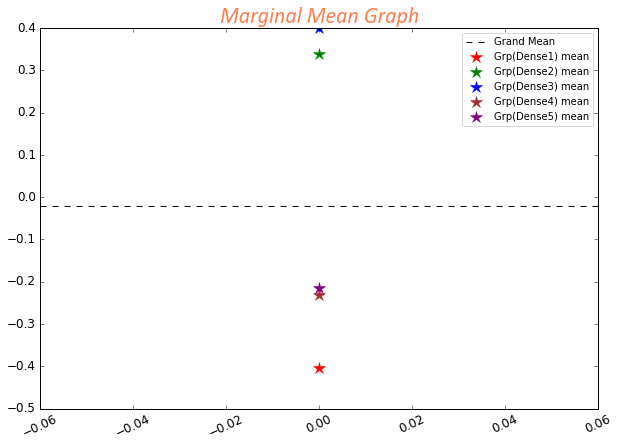

In [92]:
marginal_mean_plot(grp_pos_cases,dense_grps_grand_mean,
                   grp1='Dense1',
                   grp2='Dense2',
                   grp3='Dense3',
                   grp4='Dense4',
                   grp5='Dense5')

##### **Here, its also been proved that Grp4 and Grp5 have closer means.**

##### **Normlity Tests on Model Residuals**

In [93]:
scipy.stats.anderson(dense_grp_resid)

AndersonResult(statistic=3.9950042327282063, critical_values=array([0.575, 0.655, 0.786, 0.917, 1.091]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))

In [94]:
scipy.stats.normaltest(dense_grp_resid)

NormaltestResult(statistic=40.30410635651301, pvalue=1.7704126565201233e-09)

In [95]:
from statsmodels.stats.diagnostic import lilliefors

In [96]:
lilliefors(dense_grp_resid)

(0.02237560488258883, 0.0009999999999998899)

In [97]:
scipy.stats.kstest(dense_grp_resid,cdf='norm')

KstestResult(statistic=0.025651036031644425, pvalue=0.01049714753962541)

##### **Homogenity Tests**

In [98]:
scipy.stats.bartlett(grp_pos_cases[~grp_pos_cases['Dense1'].isna()]['Dense1'],
                     grp_pos_cases[~grp_pos_cases['Dense2'].isna()]['Dense2'],
                     grp_pos_cases[~grp_pos_cases['Dense3'].isna()]['Dense3'],
                     grp_pos_cases[~grp_pos_cases['Dense4'].isna()]['Dense4'],
                     grp_pos_cases[~grp_pos_cases['Dense5'].isna()]['Dense5'])

BartlettResult(statistic=130.2137139048428, pvalue=3.505078917545573e-27)

##### **Parametric Levene Test**

In [99]:
scipy.stats.levene(grp_pos_cases[~grp_pos_cases['Dense1'].isna()]['Dense1'],
                     grp_pos_cases[~grp_pos_cases['Dense2'].isna()]['Dense2'],
                     grp_pos_cases[~grp_pos_cases['Dense3'].isna()]['Dense3'],
                     grp_pos_cases[~grp_pos_cases['Dense4'].isna()]['Dense4'],
                     grp_pos_cases[~grp_pos_cases['Dense5'].isna()]['Dense5'],center='mean')

LeveneResult(statistic=43.88995730432964, pvalue=4.2273834535615835e-36)

##### **All the above tests concludes that Density Groups have a significant role in the variantion of number of cases reported in the states.**

##### **Now, there is one important point that in the earlier plotting we found that our data doesn't belongs to a normal distribution which is one of the ANOVA assumptions. And, the variances of data are also not equal across the groups. Therefore, we will conduct the Non-parametric tests.**

##### **Non-parametric replacement of ANOVA is ``Kruskal-Wallis`` Test**

In [100]:
scipy.stats.kruskal(pt_dense_grp1['pos_pt_dense1'],
                     pt_dense_grp2['pos_pt_dense2'],
                     pt_dense_grp3['pos_pt_dense3'],
                     pt_dense_grp4['pos_pt_dense4'],
                     pt_dense_grp5['pos_pt_dense5'])

KruskalResult(statistic=465.62372045417294, pvalue=1.819534601931187e-99)

In [101]:
import scikit_posthocs

##### **Post-Hoc -- MannWhitney Test with no correction of alpha**

In [102]:
pd.DataFrame(scikit_posthocs.posthoc_mannwhitney(grp_pos_cases_melt[['Dense_Grps','Positive']],
                                                 val_col='Positive',
                                                 group_col='Dense_Grps')).applymap(lambda val: np.round(val,5))

Dense1   Dense2   Dense3   Dense4   Dense5
Dense1  1.00000  0.00000  0.00000  0.00027  0.00360
Dense2  0.00000  1.00000  0.43591  0.00000  0.00000
Dense3  0.00000  0.43591  1.00000  0.00000  0.00000
Dense4  0.00027  0.00000  0.00000  1.00000  0.99716
Dense5  0.00360  0.00000  0.00000  0.99716  1.00000

##### **Quite similar results here too, Grp4 and Grp5 tends to have some similarities. Now, to get more precise results I would use ``Sidak`` correction for alpha as it is a very powerful concept and personally like this concept.**
##### **NOTE: We can also use Bonferroni Correction but it might be not so accurate some times.**

##### **Post-Hoc -- MannWhitney Test with Sidak correction of alpha**

In [103]:
pd.DataFrame(scikit_posthocs.posthoc_mannwhitney(grp_pos_cases_melt[['Dense_Grps','Positive']],
                                                 val_col='Positive',
                                                 group_col='Dense_Grps',
                                                 p_adjust='sidak')).applymap(lambda val: np.round(val,5))

Dense1   Dense2   Dense3   Dense4   Dense5
Dense1  1.00000  0.00000  0.00000  0.00274  0.03543
Dense2  0.00000  1.00000  0.99674  0.00000  0.00000
Dense3  0.00000  0.99674  1.00000  0.00000  0.00000
Dense4  0.00274  0.00000  0.00000  1.00000  1.00000
Dense5  0.03543  0.00000  0.00000  1.00000  1.00000

##### **Fairly same results with some precise values.**

##### **Non-Parametric Levene Test**

In [104]:
scipy.stats.levene(grp_pos_cases[~grp_pos_cases['Dense1'].isna()]['Dense1'],
                     grp_pos_cases[~grp_pos_cases['Dense2'].isna()]['Dense2'],
                     grp_pos_cases[~grp_pos_cases['Dense3'].isna()]['Dense3'],
                     grp_pos_cases[~grp_pos_cases['Dense4'].isna()]['Dense4'],
                     grp_pos_cases[~grp_pos_cases['Dense5'].isna()]['Dense5'],center='median')

LeveneResult(statistic=42.883650220306166, pvalue=2.844472046993574e-35)

## **``Two Factor ANOVA``**

## **``CASE STUDY``**

#### **Case study prepared by: Emily Zitek**

#### **Overview**
- People have different ways of improving their mood when angry. We have all seen people punch a wall when mad, and indeed, previous research has indicated that some people aggress to improve their mood (Bushman, Baumeister & Phillips, 2001). What do the top athletes do when angry? Striegel (1994) found that anger often hurts an athlete’s performance and that capability to control anger is what makes good athletes even better. This study adds to the past research and examines the difference in ways to improve an angry mood by gender and sports participation.
- The participants were 78 Rice University undergraduates, ages 17 to 23. Of these 78 participants, 48 were females and 30 were males and 25 were athletes and 53 were non-athletes. People who did not play a varsity or club sport were considered non-athletes. The 13 contact sport athletes played soccer, football, rugby, or basketball, and the 12 non-contact sport athletes participated in Ultimate Frisbee, baseball, tennis, swimming, volleyball, crew, or dance.
- The participants were asked to respond to a questionnaire that asked about what they do to improve their mood when angry or furious. Then they filled out a demographics questionnaire.

- Note: This study used the most recent version of the State-Trait Anger Expression Inventory (STAXI-2) (Spielberger, Sydeman, Owen & Marsh, 1999) which was modified to create an Angry Mood Improvement Inventory similar to that created by Bushman et al. (2001).

#### **Questions to Answer**
- Do athletes and non-athletes deal with anger in the same way? Are there any gender differences? Specifically, are men more likely to believe that aggressive behavior can improve an angry mood?

#### **Descriptions of Variables**
![img1](Datasets\Anger_mood_variables.png)

In [105]:
anger_mood = pd.read_excel('Datasets/angry_moods.xls')

In [106]:
anger_mood.head()

Gender  Sports  Anger-Out  Anger-In  Control-Out  Control-In  \
0       2       1         18        13           23          20   
1       2       1         14        17           25          24   
2       2       1         13        14           28          28   
3       2       1         17        24           23          23   
4       1       1         16        17           26          28   

   Anger_Expression  
0                36  
1                30  
2                19  
3                43  
4                27

In [107]:
anger_mood.describe()

Gender     Sports  Anger-Out   Anger-In  Control-Out  Control-In  \
count  78.000000  78.000000  78.000000  78.000000    78.000000   78.000000   
mean    1.615385   1.679487  16.076923  18.576923    23.692308   21.961538   
std     0.489653   0.469694   4.217370   4.697386     4.688498    4.945002   
min     1.000000   1.000000   9.000000  10.000000    14.000000   11.000000   
25%     1.000000   1.000000  13.000000  15.000000    21.000000   18.250000   
50%     2.000000   2.000000  16.000000  18.500000    24.000000   22.000000   
75%     2.000000   2.000000  18.000000  22.000000    27.000000   24.750000   
max     2.000000   2.000000  27.000000  31.000000    32.000000   32.000000   

       Anger_Expression  
count         78.000000  
mean          37.000000  
std           12.941426  
min            7.000000  
25%           27.000000  
50%           36.000000  
75%           44.750000  
max           68.000000

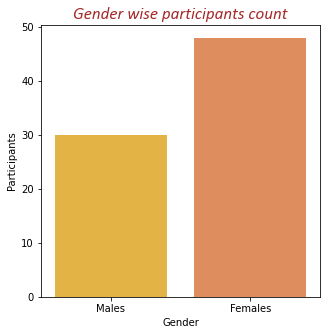

In [108]:
with plt.style.context('seaborn-bright'):
    plt.figure(figsize=(5,5))
    sns.barplot(data=anger_mood['Gender'].value_counts().reset_index().rename(columns={'index':'Gender','Gender':'Participants'}),
                x='Gender',y='Participants',palette=sns.color_palette('plasma_r'))
    plt.xticks([0,1],['Males','Females'])
    plt.title('Gender wise participants count',fontdict=font_dicts(kind='title'))

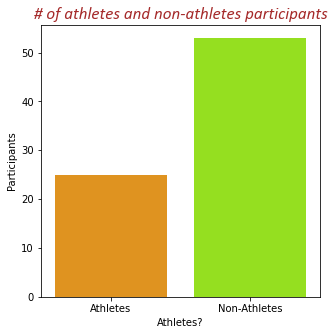

In [109]:
with plt.style.context('seaborn-bright'):
    plt.figure(figsize=(5,5))
    sns.barplot(data=anger_mood['Sports'].value_counts().reset_index().rename(columns={'index':'Athletes?','Sports':'Participants'}),
                x='Athletes?',y='Participants',palette=sns.color_palette('gist_rainbow'))
    plt.xticks([0,1],['Athletes','Non-Athletes'])
    plt.title('# of athletes and non-athletes participants',fontdict=font_dicts(kind='title'))

In [110]:
def feat_pt_ss(frame,col):
    """
    Description: This function is created for performing the Power Transformation abd Standard Scaling on the features of the dataset.
    
    Input: It accepts below input parameters:
        1. frame: pandas DataFrame
                Dataset containing features
        2. col: str
                Features which you want to transform
    
    Return: None
        It creates the transformed features in the dataset.
    """
    col_pt_name = str(col)+'_pt'
    col_pt_ss_name = str(col)+'_pt_ss'
    frame[col_pt_name] = scipy.stats.boxcox(frame[col])[0]
    frame[col_pt_ss_name] = ss.fit_transform(frame[[col_pt_name]])

In [111]:
df_cols = ['Anger-Out','Anger-In','Control-Out','Control-In','Anger_Expression']
for feat in df_cols:
    feat_pt_ss(anger_mood,feat)

In [112]:
anger_mood.head()

Gender  Sports  Anger-Out  Anger-In  Control-Out  Control-In  \
0       2       1         18        13           23          20   
1       2       1         14        17           25          24   
2       2       1         13        14           28          28   
3       2       1         17        24           23          23   
4       1       1         16        17           26          28   

   Anger_Expression  Anger-Out_pt  Anger-Out_pt_ss  Anger-In_pt  \
0                36      2.938922         0.564209     4.516347   
1                30      2.679492        -0.406073     5.319725   
2                19      2.603134        -0.691656     4.729601   
3                43      2.879852         0.343284     6.489748   
4                27      2.817242         0.109120     5.319725   

   Anger-In_pt_ss  Control-Out_pt  Control-Out_pt_ss  Control-In_pt  \
0       -1.240888       47.728275          -0.182358      13.499843   
1       -0.269975       53.406850           0.252661      15.925653   
2       -0.983162       62.205965           0.926737      18.286565   
3        1.144042       47.728275          -0.182358      15.325789   
4       -0.269975       56.303373           0.474556      18.286565   

   Control-In_pt_ss  Anger_Expression_pt  Anger_Expression_pt_ss  
0         -0.382374            19.693945               -0.037114  
1          0.428930            16.913629               -0.510827  
2          1.218528            11.460573               -1.439924  
3          0.228307            22.811737                0.494099  
4          1.218528            15.478238               -0.755390

#### **Visualizing the features distribution post transformation and scaling**

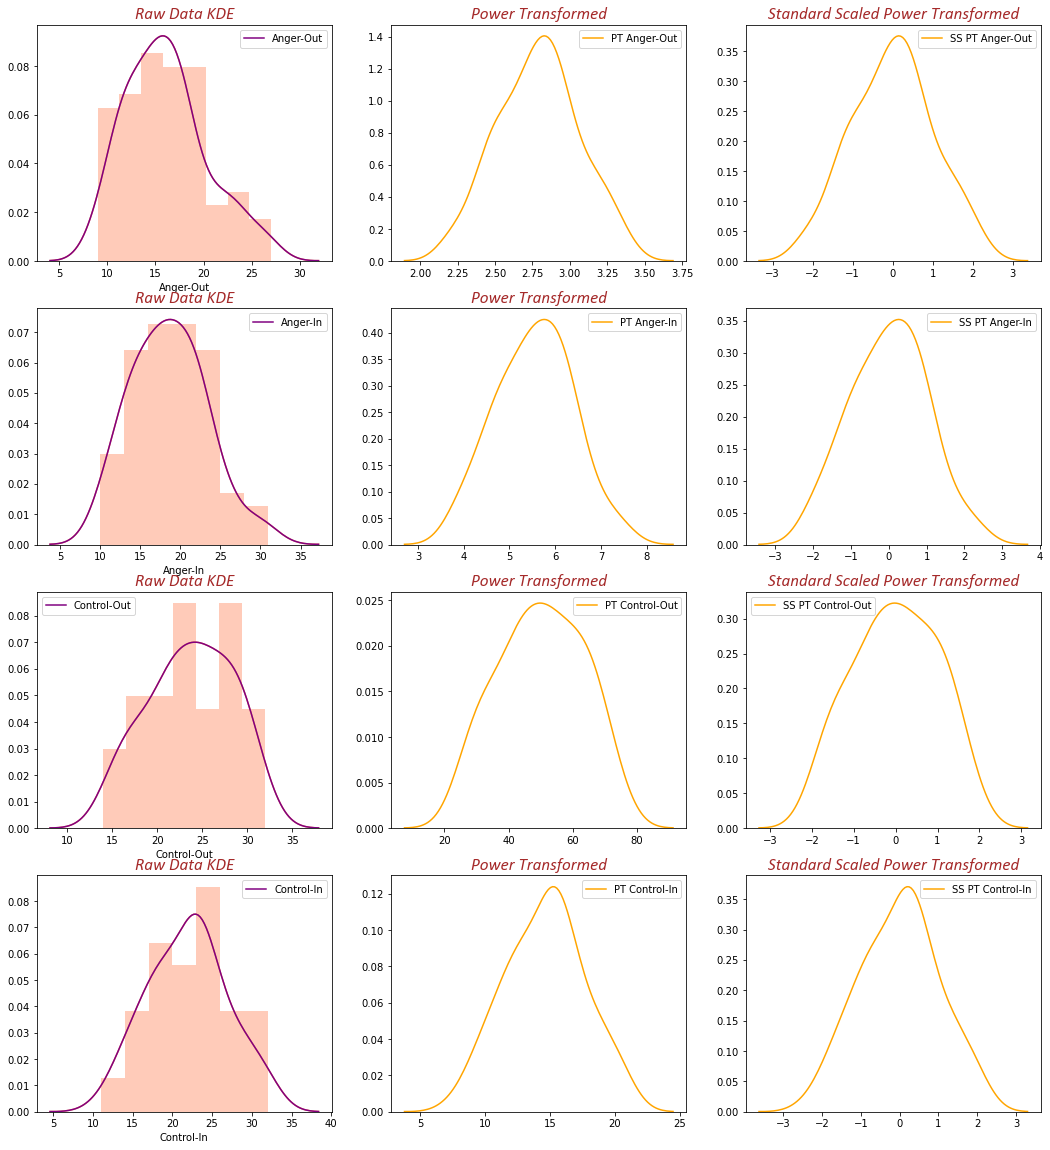

In [113]:
with plt.style.context('seaborn-bright'):
    fig , ax = plt.subplots(nrows=4,ncols=3,figsize=(18,20))
    sns.distplot(anger_mood['Anger-Out'],ax=ax[0,0],color='coral')
    sns.kdeplot(anger_mood['Anger-Out'],ax=ax[0,0],label='Anger-Out',color='purple')
    sns.kdeplot(anger_mood['Anger-Out_pt'],ax=ax[0,1],label='PT Anger-Out',color='orange')
    sns.kdeplot(anger_mood['Anger-Out_pt_ss'],ax=ax[0,2],label='SS PT Anger-Out',color='orange')
    ax[0,0].set_title('Raw Data KDE',fontdict=font_dicts(kind='title'))
    ax[0,1].set_title('Power Transformed',fontdict=font_dicts(kind='title'))
    ax[0,2].set_title('Standard Scaled Power Transformed',fontdict=font_dicts(kind='title'))
    
    sns.distplot(anger_mood['Anger-In'],ax=ax[1,0],color='coral')
    sns.kdeplot(anger_mood['Anger-In'],ax=ax[1,0],label='Anger-In',color='purple')
    sns.kdeplot(anger_mood['Anger-In_pt'],ax=ax[1,1],label='PT Anger-In',color='orange')
    sns.kdeplot(anger_mood['Anger-In_pt_ss'],ax=ax[1,2],label='SS PT Anger-In',color='orange')
    ax[1,0].set_title('Raw Data KDE',fontdict=font_dicts(kind='title'))
    ax[1,1].set_title('Power Transformed',fontdict=font_dicts(kind='title'))
    ax[2,2].set_title('Standard Scaled Power Transformed',fontdict=font_dicts(kind='title'))
    
    sns.distplot(anger_mood['Control-Out'],ax=ax[2,0],color='coral')
    sns.kdeplot(anger_mood['Control-Out'],ax=ax[2,0],label='Control-Out',color='purple')
    sns.kdeplot(anger_mood['Control-Out_pt'],ax=ax[2,1],label='PT Control-Out',color='orange')
    sns.kdeplot(anger_mood['Control-Out_pt_ss'],ax=ax[2,2],label='SS PT Control-Out',color='orange')
    ax[2,0].set_title('Raw Data KDE',fontdict=font_dicts(kind='title'))
    ax[2,1].set_title('Power Transformed',fontdict=font_dicts(kind='title'))
    ax[2,2].set_title('Standard Scaled Power Transformed',fontdict=font_dicts(kind='title'))
    
    sns.distplot(anger_mood['Control-In'],ax=ax[3,0],color='coral')
    sns.kdeplot(anger_mood['Control-In'],ax=ax[3,0],label='Control-In',color='purple')
    sns.kdeplot(anger_mood['Control-In_pt'],ax=ax[3,1],label='PT Control-In',color='orange')
    sns.kdeplot(anger_mood['Control-In_pt_ss'],ax=ax[3,2],label='SS PT Control-In',color='orange')
    ax[3,0].set_title('Raw Data KDE',fontdict=font_dicts(kind='title'))
    ax[3,1].set_title('Power Transformed',fontdict=font_dicts(kind='title'))
    ax[3,2].set_title('Standard Scaled Power Transformed',fontdict=font_dicts(kind='title'))

### **After seeing the above KDE, its been evident that Power Transformation has introduced very slight variation in the distribution towards normality, however, the raw data distribution of features pretty much looks gaussian-like.**

### **But, we have a very small sample data so let's see what QQ plots and Normality tests(these tests are preferrable only when sample is fairly small) will bring in front of us.**

#### **Visualizing QQ plots**

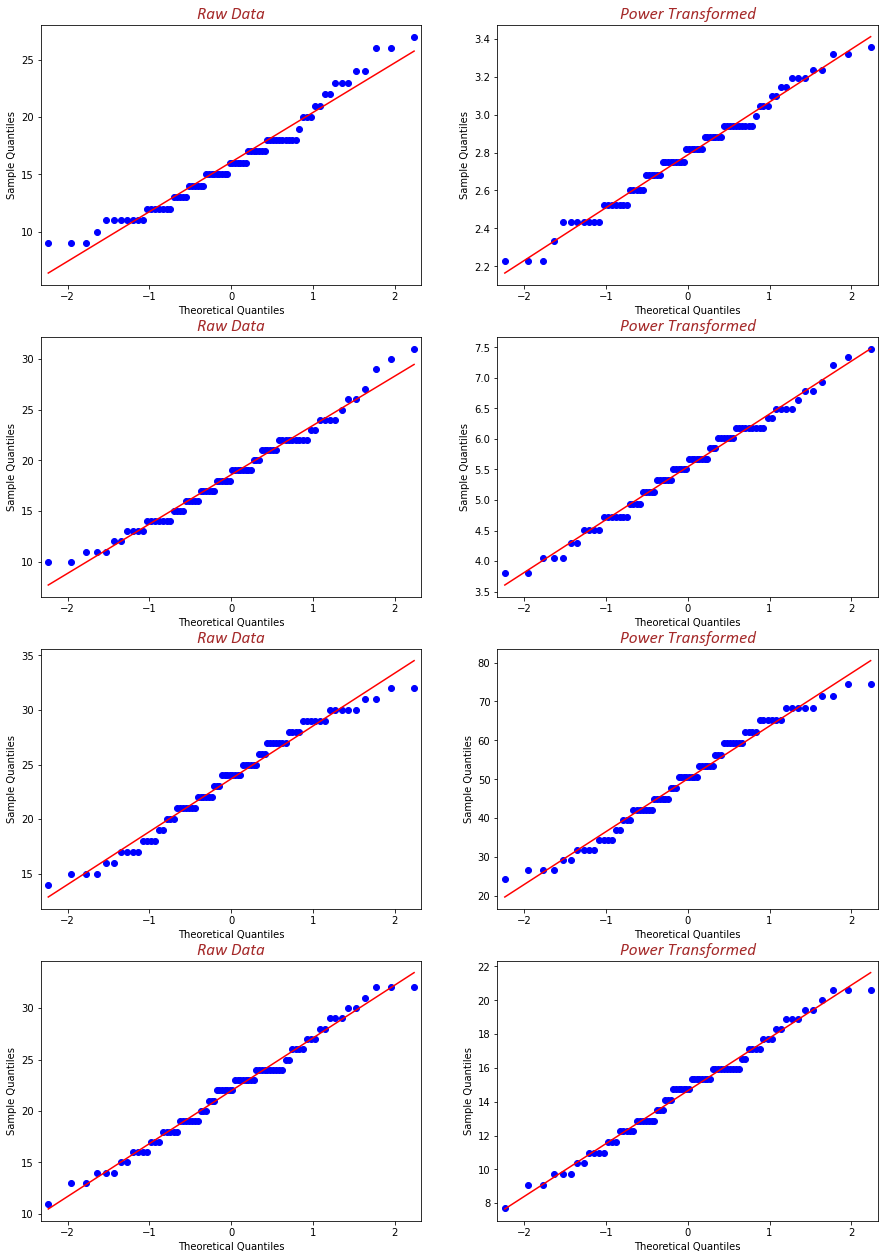

In [114]:
with plt.style.context('seaborn-bright'):
    fig , ax = plt.subplots(nrows=4,ncols=2,figsize=(15,22))
    stm.graphics.gofplots.qqplot(anger_mood['Anger-Out'],ax=ax[0,0],line='r',label='Anger-Out')
    stm.graphics.gofplots.qqplot(anger_mood['Anger-Out_pt'],ax=ax[0,1],line='r')
    ax[0,0].set_title('Raw Data',fontdict=font_dicts(kind='title'))
    ax[0,1].set_title('Power Transformed',fontdict=font_dicts(kind='title'))
    
    stm.graphics.gofplots.qqplot(anger_mood['Anger-In'],ax=ax[1,0],line='r')
    stm.graphics.gofplots.qqplot(anger_mood['Anger-In_pt'],ax=ax[1,1],line='r')
    ax[1,0].set_title('Raw Data',fontdict=font_dicts(kind='title'))
    ax[1,1].set_title('Power Transformed',fontdict=font_dicts(kind='title'))
    
    stm.graphics.gofplots.qqplot(anger_mood['Control-Out'],ax=ax[2,0],line='r')
    stm.graphics.gofplots.qqplot(anger_mood['Control-Out_pt'],ax=ax[2,1],line='r')
    ax[2,0].set_title('Raw Data',fontdict=font_dicts(kind='title'))
    ax[2,1].set_title('Power Transformed',fontdict=font_dicts(kind='title'))
    
    stm.graphics.gofplots.qqplot(anger_mood['Control-In'],ax=ax[3,0],line='r')
    stm.graphics.gofplots.qqplot(anger_mood['Control-In_pt'],ax=ax[3,1],line='r')
    ax[3,0].set_title('Raw Data',fontdict=font_dicts(kind='title'))
    ax[3,1].set_title('Power Transformed',fontdict=font_dicts(kind='title'))

### **QQ plots are also telling us the same story, power transformed does minimizes some amount of deviations and raw data can be fit in the bucket of gaussian-like.**

### **Now, lets run some normlaity tests because we have very small dataset then these tests can help us in identifying some insights.**

#### **Normality Tests**

In [115]:
print(np.round(scipy.stats.shapiro(anger_mood['Anger-Out']),4),
      np.round(scipy.stats.normaltest(anger_mood['Anger-Out']),4),
      scipy.stats.anderson(anger_mood['Anger-Out']),
      scipy.stats.kstest(pd.DataFrame(ss.fit_transform(anger_mood[['Anger-Out']]))[0],cdf='norm'),sep='\n')

[0.9597 0.0147]
[4.4764 0.1067]
AndersonResult(statistic=0.8866161999077633, critical_values=array([0.55 , 0.626, 0.752, 0.877, 1.043]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))
KstestResult(statistic=0.11801006873469855, pvalue=0.21016099597115612)


In [116]:
print(np.round(scipy.stats.shapiro(anger_mood['Anger-Out_pt']),4),
      np.round(scipy.stats.normaltest(anger_mood['Anger-Out_pt']),4),
      scipy.stats.anderson(anger_mood['Anger-Out_pt']),
      scipy.stats.kstest(anger_mood['Anger-Out_pt_ss'],cdf='norm'),sep='\n')

[0.9813 0.3063]
[0.7455 0.6888]
AndersonResult(statistic=0.42091177774017297, critical_values=array([0.55 , 0.626, 0.752, 0.877, 1.043]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))
KstestResult(statistic=0.08117785751780704, pvalue=0.6527048356296961)


In [117]:
print(np.round(scipy.stats.shapiro(anger_mood['Anger-In']),4),
      np.round(scipy.stats.normaltest(anger_mood['Anger-In']),4),
      scipy.stats.anderson(anger_mood['Anger-In']),
      scipy.stats.kstest(pd.DataFrame(ss.fit_transform(anger_mood[['Anger-In']]))[0],cdf='norm'),sep='\n')

[0.9793 0.2346]
[1.6838 0.4309]
AndersonResult(statistic=0.38757509282743285, critical_values=array([0.55 , 0.626, 0.752, 0.877, 1.043]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))
KstestResult(statistic=0.06738948552710411, pvalue=0.8469621917851082)


In [118]:
print(np.round(scipy.stats.shapiro(anger_mood['Anger-In_pt']),4),
      np.round(scipy.stats.normaltest(anger_mood['Anger-In_pt']),4),
      scipy.stats.anderson(anger_mood['Anger-In_pt']),
      scipy.stats.kstest(anger_mood['Anger-In_pt_ss'],cdf='norm'),sep='\n')

[0.9861 0.5571]
[0.5535 0.7583]
AndersonResult(statistic=0.3421858878821098, critical_values=array([0.55 , 0.626, 0.752, 0.877, 1.043]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))
KstestResult(statistic=0.07561264312054072, pvalue=0.7350991362050974)


In [119]:
print(np.round(scipy.stats.shapiro(anger_mood['Control-Out']),4),
      np.round(scipy.stats.normaltest(anger_mood['Control-Out']),4),
      scipy.stats.anderson(anger_mood['Control-Out']),
      scipy.stats.kstest(pd.DataFrame(ss.fit_transform(anger_mood[['Control-Out']]))[0],cdf='norm'),sep='\n')

[0.969  0.0544]
[6.9335 0.0312]
AndersonResult(statistic=0.6212161705866492, critical_values=array([0.55 , 0.626, 0.752, 0.877, 1.043]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))
KstestResult(statistic=0.0944989633727723, pvalue=0.46106545331192683)


In [120]:
print(np.round(scipy.stats.shapiro(anger_mood['Control-Out_pt']),4),
      np.round(scipy.stats.normaltest(anger_mood['Control-Out_pt']),4),
      scipy.stats.anderson(anger_mood['Control-Out_pt']),
      scipy.stats.kstest(anger_mood['Control-Out_pt_ss'],cdf='norm'),sep='\n')

[0.9708 0.07  ]
[7.8824 0.0194]
AndersonResult(statistic=0.5741237073639383, critical_values=array([0.55 , 0.626, 0.752, 0.877, 1.043]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))
KstestResult(statistic=0.09114203775949703, pvalue=0.507088307466719)


In [121]:
print(np.round(scipy.stats.shapiro(anger_mood['Control-In']),4),
      np.round(scipy.stats.normaltest(anger_mood['Control-In']),4),
      scipy.stats.anderson(anger_mood['Control-In']),
      scipy.stats.kstest(pd.DataFrame(ss.fit_transform(anger_mood[['Control-In']]))[0],cdf='norm'),sep='\n')

[0.9831 0.3885]
[1.1044 0.5757]
AndersonResult(statistic=0.37670142865145806, critical_values=array([0.55 , 0.626, 0.752, 0.877, 1.043]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))
KstestResult(statistic=0.08269920968992817, pvalue=0.6299932997185698)


In [122]:
print(np.round(scipy.stats.shapiro(anger_mood['Control-In_pt']),4),
      np.round(scipy.stats.normaltest(anger_mood['Control-In_pt']),4),
      scipy.stats.anderson(anger_mood['Control-In_pt']),
      scipy.stats.kstest(anger_mood['Control-In_pt_ss'],cdf='norm'),sep='\n')

[0.9836 0.4157]
[1.0368 0.5955]
AndersonResult(statistic=0.37677245211017407, critical_values=array([0.55 , 0.626, 0.752, 0.877, 1.043]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))
KstestResult(statistic=0.08740098100613486, pvalue=0.5605715367622379)


### **Quite similar results here generated by various normality tests. So, will be using Raw Data for further 2-Way ANOVA.**

In [123]:
anger_mood.head()

Gender  Sports  Anger-Out  Anger-In  Control-Out  Control-In  \
0       2       1         18        13           23          20   
1       2       1         14        17           25          24   
2       2       1         13        14           28          28   
3       2       1         17        24           23          23   
4       1       1         16        17           26          28   

   Anger_Expression  Anger-Out_pt  Anger-Out_pt_ss  Anger-In_pt  \
0                36      2.938922         0.564209     4.516347   
1                30      2.679492        -0.406073     5.319725   
2                19      2.603134        -0.691656     4.729601   
3                43      2.879852         0.343284     6.489748   
4                27      2.817242         0.109120     5.319725   

   Anger-In_pt_ss  Control-Out_pt  Control-Out_pt_ss  Control-In_pt  \
0       -1.240888       47.728275          -0.182358      13.499843   
1       -0.269975       53.406850           0.252661      15.925653   
2       -0.983162       62.205965           0.926737      18.286565   
3        1.144042       47.728275          -0.182358      15.325789   
4       -0.269975       56.303373           0.474556      18.286565   

   Control-In_pt_ss  Anger_Expression_pt  Anger_Expression_pt_ss  
0         -0.382374            19.693945               -0.037114  
1          0.428930            16.913629               -0.510827  
2          1.218528            11.460573               -1.439924  
3          0.228307            22.811737                0.494099  
4          1.218528            15.478238               -0.755390

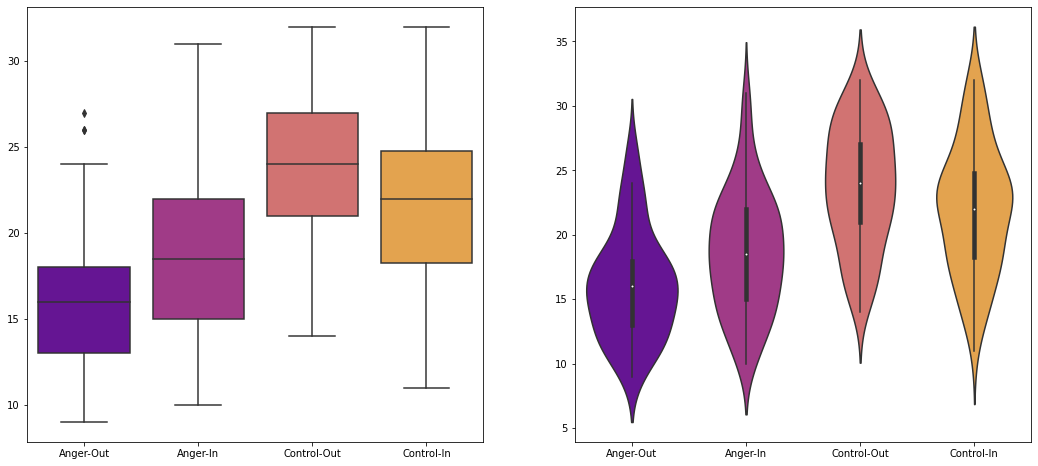

In [124]:
with plt.style.context('seaborn-bright'):
    fig,ax = plt.subplots(nrows=1,ncols=2,figsize=(18,8))
    sns.boxplot(data=anger_mood[['Anger-Out','Anger-In','Control-Out','Control-In']],palette='plasma',ax=ax[0])
    sns.violinplot(data=anger_mood[['Anger-Out','Anger-In','Control-Out','Control-In']],palette='plasma',ax=ax[1])

### **Here, it is quite clear that means are not equal across the groups. And, more number of people are able to control their anger.**

In [125]:
anger_mood_melt = pd.melt(frame=anger_mood,
                          id_vars=['Gender','Sports'],
                          value_vars=['Anger-Out','Anger-In','Control-Out','Control-In'],
                          var_name='Groups',
                          value_name='Score')

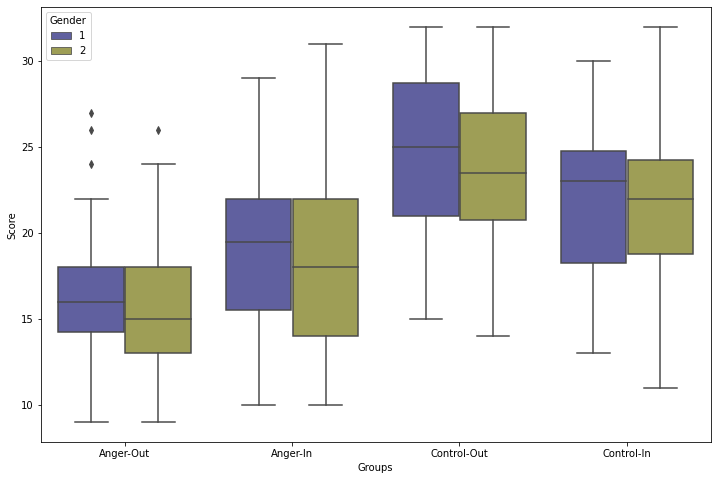

In [126]:
with plt.style.context('seaborn-bright'):
    plt.figure(figsize=(12,8))
    sns.boxplot(data=anger_mood_melt,x='Groups',y='Score',hue='Gender',palette='gist_stern')

### **Here, on an average we can say that Males believe in expressing anger verbally or physically, however, this is also true for some females as well. The difference in both the genders is quite small when it comes to applying cooling or calming off techniques, but, womens can be very slightly better in it.**

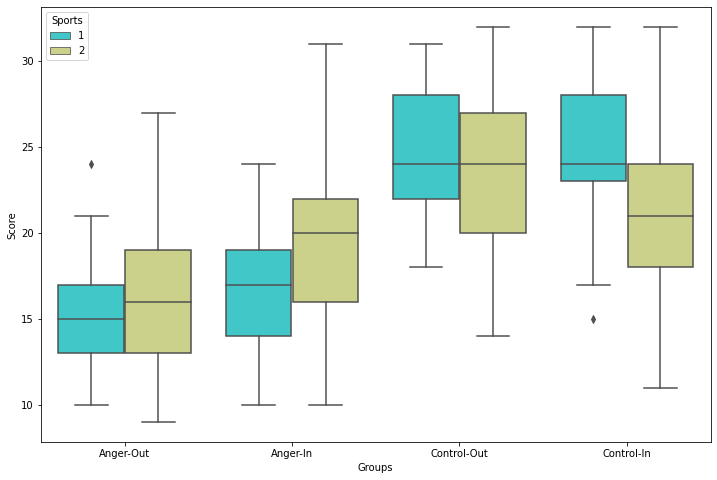

In [127]:
with plt.style.context('seaborn-bright'):
    plt.figure(figsize=(12,8))
    sns.boxplot(data=anger_mood_melt,x='Groups',y='Score',hue='Sports',palette='rainbow')

### **One thing pretty clear here that athletes are good with calming or cooling off techniques. And, same group also believe less in expressing anger verbally or physically aggressive. There is one more thing that athletes tend to experience less number of anger issues. However, few non-athletes are good in controlling the outward expression of angry feelings better than athletes.**

In [128]:
anger_mood_melt.head()

Gender  Sports     Groups  Score
0       2       1  Anger-Out     18
1       2       1  Anger-Out     14
2       2       1  Anger-Out     13
3       2       1  Anger-Out     17
4       1       1  Anger-Out     16

In [129]:
from statsmodels.formula.api import ols
from statsmodels.stats.api import anova_lm

In [130]:
anger_mood_model = ols('Score ~ C(Groups)+C(Gender)+C(Sports)',data=anger_mood_melt).fit()

In [131]:
anger_mood_model_annova_table = anova_lm(anger_mood_model)
anger_mood_fdist_grps = scipy.stats.f(3,306)
anger_mood_fdist_gender = scipy.stats.f(1,306)
anger_mood_fdist_sports = scipy.stats.f(1,306)
anger_mood_model_annova_table['F_Crit'] = [anger_mood_fdist_grps.ppf(0.95),
                                           anger_mood_fdist_gender.ppf(0.95),
                                           anger_mood_fdist_sports.ppf(0.95),
                                           None]

anger_mood_model_annova_table['Alpha'] = [0.05,0.05,0.05,None]
anger_mood_model_annova_table = anger_mood_model_annova_table.applymap(lambda val: np.round(val,4))
anger_mood_model_annova_table

df     sum_sq   mean_sq        F  PR(>F)  F_Crit  Alpha
C(Groups)    3.0  2720.0769  906.6923  42.0026  0.0000  2.6341   0.05
C(Gender)    1.0    36.2924   36.2924   1.6812  0.1957  3.8720   0.05
C(Sports)    1.0     2.2860    2.2860   0.1059  0.7451  3.8720   0.05
Residual   306.0  6605.4985   21.5866      NaN     NaN     NaN    NaN

In [132]:
anger_mood_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Score   R-squared:                       0.295
Model:                            OLS   Adj. R-squared:                  0.283
Method:                 Least Squares   F-statistic:                     25.56
Date:                Thu, 26 Nov 2020   Prob (F-statistic):           1.53e-21
Time:                        01:19:07   Log-Likelihood:                -918.92
No. Observations:                 312   AIC:                             1850.
Df Residuals:                     306   BIC:                             1872.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                   19.1249      0.718     26.633      0.000      17.712      20.538
C(Groups)[T.Anger-Out]      -2.5000      0.744     -3.360      0.001      -3.964      -1.036
C(Groups)[T.Control-In]      3.3846      0.744      4.549      0.000       1.921       4.849
C(Groups)[T.Control-Out]     5.1154      0.744      6.876      0.000       3.651       6.579
C(Gender)[T.2]              -0.6872      0.542     -1.267      0.206      -1.754       0.380
C(Sports)[T.2]              -0.1840      0.565     -0.325      0.745      -1.296       0.929
==============================================================================
Omnibus:                        4.840   Durbin-Watson:                   1.998
Prob(Omnibus):                  0.089   Jarque-Bera (JB):                3.998
Skew:                           0.182   Prob(JB):                        0.135
Kurtosis:                       2.581   Cond. No.                         6.56
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### **Post-Hoc Test**

In [133]:
import scikit_posthocs as post_hocs
from statsmodels.stats.multicomp import pairwise_tukeyhsd as tukeyhsd

In [134]:
post_hoc_tukey = tukeyhsd(endog=anger_mood_melt['Score'],groups=anger_mood_melt['Groups'])

In [135]:
post_hoc_tukey.summary()

<class 'statsmodels.iolib.table.SimpleTable'>

c:\users\rajsh\appdata\local\programs\python\python36\lib\site-packages\statsmodels\sandbox\stats\multicomp.py:775: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_yticklabels(np.insert(self.groupsunique.astype(str), 0, ''))


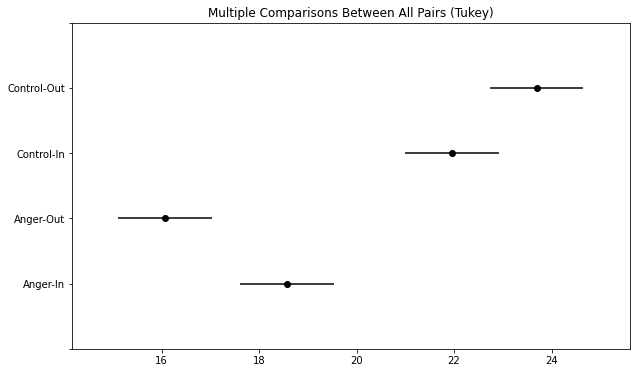

In [136]:
post_hoc_tukey.plot_simultaneous();

#### **Interaction Among variables**

In [137]:
anger_mood_model_intr_grp_gender = ols('Score ~ C(Groups)*C(Gender)',data=anger_mood_melt).fit()

In [138]:
anova_lm(anger_mood_model_intr_grp_gender).applymap(lambda val : np.round(val,4))

df     sum_sq   mean_sq        F  PR(>F)
C(Groups)              3.0  2720.0769  906.6923  41.8072  0.0000
C(Gender)              1.0    36.2924   36.2924   1.6734  0.1968
C(Groups):C(Gender)    3.0    14.7887    4.9296   0.2273  0.8774
Residual             304.0  6592.9958   21.6875      NaN     NaN

In [139]:
anger_mood_melt.groupby(['Gender'])['Score'].mean()

Gender
1    20.508333
2    19.807292
Name: Score, dtype: float64

In [140]:
anger_mood_melt.groupby(['Gender','Groups'])[['Score']].mean()

Score
Gender Groups                
1      Anger-In     19.033333
       Anger-Out    16.566667
       Control-In   21.966667
       Control-Out  24.466667
2      Anger-In     18.291667
       Anger-Out    15.770833
       Control-In   21.958333
       Control-Out  23.208333

### **The test shows no significant interaction between Groups and Gender. Also, the means across groups is very close for both the genders. Thus, we can say that there are no gener differences.**

In [141]:
anger_mood_model_intr_grp_sports = ols('Score ~ C(Groups)*C(Sports)',data=anger_mood_melt).fit()

In [142]:
anova_lm(anger_mood_model_intr_grp_sports).applymap(lambda val : np.round(val,4))

df     sum_sq   mean_sq        F  PR(>F)
C(Groups)              3.0  2720.0769  906.6923  44.1172  0.0000
C(Sports)              1.0     3.9138    3.9138   0.1904  0.6629
C(Groups):C(Sports)    3.0   392.3880  130.7960   6.3642  0.0003
Residual             304.0  6247.7751   20.5519      NaN     NaN

In [143]:
anger_mood_melt.groupby(['Sports'])['Score'].mean()

Sports
1    20.24
2    20.00
Name: Score, dtype: float64

In [144]:
anger_mood_melt.groupby(['Sports','Groups'])[['Score']].mean()

Score
Sports Groups                
1      Anger-In     16.680000
       Anger-Out    15.280000
       Control-In   24.320000
       Control-Out  24.680000
2      Anger-In     19.471698
       Anger-Out    16.452830
       Control-In   20.849057
       Control-Out  23.226415

### **The test shows significant interaction between Groups and Athletes status. And, it clearly shows that athletes are better in cooling off techniques and they deal with anger very much differently as compare to others.**

#### **Normality Tests**

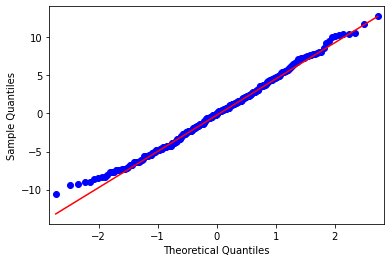

In [145]:
stm.graphics.gofplots.qqplot(anger_mood_model.resid,line='q');

In [146]:
scipy.stats.anderson(anger_mood_model.resid)

AndersonResult(statistic=0.43044544886271296, critical_values=array([0.569, 0.648, 0.777, 0.907, 1.078]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))

In [147]:
scipy.stats.normaltest(anger_mood_model.resid)

NormaltestResult(statistic=4.839692299736987, pvalue=0.08893529911436146)

### **Pretty good here. Now, as normlaity tests have been passed therefore we will perform parametric homogenity tests.**

#### **Bartlett test**

In [148]:
scipy.stats.bartlett(anger_mood['Anger-Out'],anger_mood['Anger-In'],anger_mood['Control-Out'],anger_mood['Control-In'])

BartlettResult(statistic=1.9996104310731075, pvalue=0.5724875648993066)

#### **Levene test**

In [149]:
scipy.stats.levene(anger_mood['Anger-Out'],anger_mood['Anger-In'],anger_mood['Control-Out'],anger_mood['Control-In'],center='mean')

LeveneResult(statistic=0.9134212779534832, pvalue=0.43472151627992617)

### **Pretty good here as well that means the variances in the groups are also equal.**

#### **White test**

In [150]:
from statsmodels.stats.diagnostic import het_breuschpagan
from statsmodels.stats.diagnostic import het_white

In [151]:
anger_mood_model.model.exog_names

['Intercept',
 'C(Groups)[T.Anger-Out]',
 'C(Groups)[T.Control-In]',
 'C(Groups)[T.Control-Out]',
 'C(Gender)[T.2]',
 'C(Sports)[T.2]']

In [152]:
white_test = het_white(anger_mood_model.resid,anger_mood_model.model.exog)

In [153]:
labels = ['LM Statistic', 'LM-Test p-value', 'F-Statistic', 'F-Test p-value']

In [154]:
dict(zip(labels, white_test))

{'LM Statistic': 12.351023449755298,
 'LM-Test p-value': 0.4179161019156023,
 'F-Statistic': 1.0270228112664146,
 'F-Test p-value': 0.4236543113708347}

#### **Breusch-Pagan test**

In [155]:
bp_test = het_breuschpagan(anger_mood_model.resid,exog_het=anger_mood_model.model.exog)

In [156]:
dict(zip(labels, bp_test))

{'LM Statistic': 6.958054139855664,
 'LM-Test p-value': 0.22377861456398046,
 'F-Statistic': 1.3959815007028675,
 'F-Test p-value': 0.22550477343744865}

### **This model is not heteroskedastic.**

## **``Does Normality Tests are sensitive to data normalization?``**

#### **CASE-I :: Random Data**

In [157]:
rand_data = np.random.lognormal(size=800)
#rand_data = np.random.randint(low=1000,high=4000,size=900)

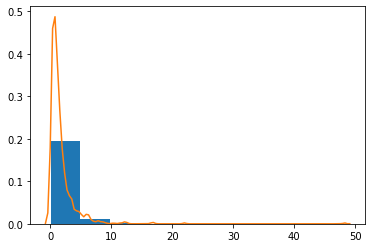

In [158]:
plt.hist(rand_data,density=True)
sns.kdeplot(rand_data);

##### **Perfect example of Power-Law distribution**

In [159]:
from sklearn.preprocessing import MinMaxScaler, RobustScaler

In [160]:
mm=MinMaxScaler()
rb=RobustScaler()

In [161]:
rand_data_pt = pd.DataFrame(scipy.stats.boxcox(rand_data,lmbda=None)[0])[0]
rand_data_pt

0     -0.385262
1      1.632466
2     -0.095439
3      0.193932
4      0.046274
         ...   
795   -1.130698
796   -0.008543
797    0.455478
798   -0.078449
799    1.797973
Name: 0, Length: 800, dtype: float64

In [162]:
rand_data_pt_ss = pd.DataFrame(ss.fit_transform(pd.DataFrame(rand_data_pt)))[0]
rand_data_pt_ss

0     -0.392864
1      1.631224
2     -0.102128
3      0.188155
4      0.040033
         ...   
795   -1.140650
796   -0.014958
797    0.450526
798   -0.085084
799    1.797253
Name: 0, Length: 800, dtype: float64

##### **Mean and Std dev of raw data**

In [163]:
np.mean(rand_data), np.std(rand_data)

(1.690907728065045, 2.583430432300684)

##### **Mean and Std dev of power-transformed data**

In [164]:
np.mean(rand_data_pt), np.std(rand_data_pt)

(0.006367580219724869, 0.9968577128355772)

##### **Mean and Std dev of standard-scaled power-transformed data**

In [165]:
np.round(np.mean(rand_data_pt_ss),4), np.std(rand_data_pt_ss)

(-0.0, 1.0000000000000002)

##### **Distribution of power transformed data**

<AxesSubplot:>

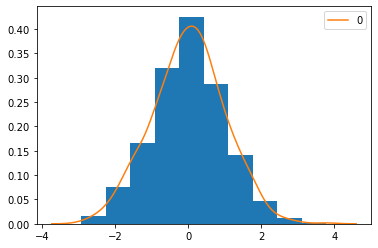

In [166]:
plt.hist(rand_data_pt,density=True)
sns.kdeplot(data=rand_data_pt)

##### **A potential candidate to be named as Normal Distribution.**

##### **Distribution of standard scaled power transformed data**

<AxesSubplot:>

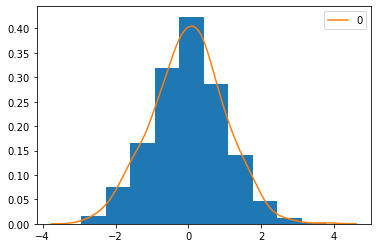

In [167]:
plt.hist(rand_data_pt_ss,density=True)
sns.kdeplot(data=rand_data_pt_ss)

##### **As expected no difference in the distribution plot as compared to power-transformed data distribution.**

#### **Skew Test**

In [168]:
scipy.stats.skew(rand_data), scipy.stats.skewtest(rand_data)

(9.11325321673112,
 SkewtestResult(statistic=29.84827839996544, pvalue=9.242188302623735e-196))

In [169]:
scipy.stats.skew(rand_data_pt), scipy.stats.skewtest(rand_data_pt)

(-0.00024105237543797247,
 SkewtestResult(statistic=-0.002808958891162989, pvalue=0.9977587780161118))

In [170]:
scipy.stats.skew(rand_data_pt_ss), scipy.stats.skewtest(rand_data_pt_ss)

(-0.00024105237543791346,
 SkewtestResult(statistic=-0.002808958891162989, pvalue=0.9977587780161118))

#### **Kurtosis Test**

In [171]:
scipy.stats.kurtosis(rand_data), scipy.stats.kurtosistest(rand_data)

(138.59782081783035,
 KurtosistestResult(statistic=19.064369203571722, pvalue=4.992619757827792e-81))

In [172]:
scipy.stats.kurtosis(rand_data_pt), scipy.stats.kurtosistest(rand_data_pt)

(0.05247452926119722,
 KurtosistestResult(statistic=0.4261846786164395, pvalue=0.6699732808672292))

In [173]:
scipy.stats.kurtosis(rand_data_pt_ss), scipy.stats.kurtosistest(rand_data_pt_ss)

(0.05247452926119722,
 KurtosistestResult(statistic=0.4261846786164395, pvalue=0.6699732808672292))

#### **Shapiro-Wilk Test**

In [174]:
scipy.stats.shapiro(rand_data)

ShapiroResult(statistic=0.461603581905365, pvalue=1.2611686178923354e-43)

In [175]:
scipy.stats.shapiro(rand_data_pt)

ShapiroResult(statistic=0.9983544945716858, pvalue=0.6580410599708557)

In [176]:
scipy.stats.shapiro(rand_data_pt_ss)

ShapiroResult(statistic=0.9983544945716858, pvalue=0.6580410599708557)

#### **Anderson-Darling Test**

In [177]:
scipy.stats.anderson(rand_data)

AndersonResult(statistic=93.13401856572364, critical_values=array([0.573, 0.653, 0.783, 0.913, 1.087]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))

In [178]:
scipy.stats.anderson(rand_data_pt)

AndersonResult(statistic=0.3467804346187222, critical_values=array([0.573, 0.653, 0.783, 0.913, 1.087]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))

In [179]:
scipy.stats.anderson(rand_data_pt_ss)

AndersonResult(statistic=0.3467804346187222, critical_values=array([0.573, 0.653, 0.783, 0.913, 1.087]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))

#### **D-Agastino Test**

In [180]:
scipy.stats.normaltest(rand_data)

NormaltestResult(statistic=1254.3698965719375, pvalue=4.140357353595525e-273)

In [181]:
scipy.stats.normaltest(rand_data_pt)

NormaltestResult(statistic=0.18164127053745005, pvalue=0.9131814887631777)

In [182]:
scipy.stats.normaltest(rand_data_pt_ss)

NormaltestResult(statistic=0.18164127053745005, pvalue=0.9131814887631777)

#### **QQ Plot**

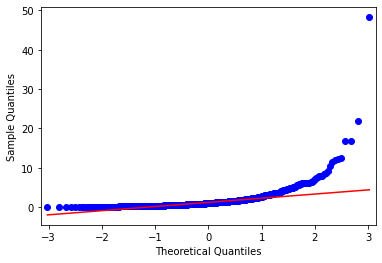

In [183]:
ProbPlot(rand_data).qqplot(line='q');

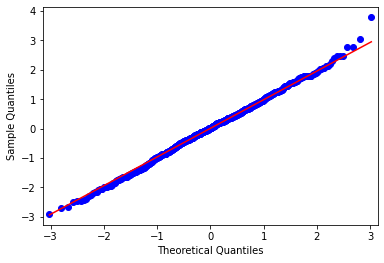

In [184]:
ProbPlot(rand_data_pt).qqplot(line='q');

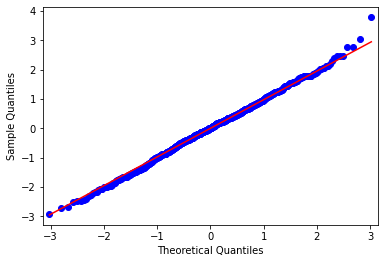

In [185]:
ProbPlot(rand_data_pt_ss).qqplot(line='q');

#### **KS Test**

In [186]:
np.round(np.mean(rand_data),4), np.round(np.std(rand_data),4)

(1.6909, 2.5834)

In [187]:
scipy.stats.kstest(rand_data,cdf='norm')   ## Raw sample data was used

KstestResult(statistic=0.5352018323315454, pvalue=1.109660260977972e-214)

In [188]:
np.round(np.mean(rand_data_pt),4), np.round(np.std(rand_data_pt),4)

(0.0064, 0.9969)

In [189]:
scipy.stats.kstest(rand_data_pt,cdf='norm') ## Power Transformed Sample Data was used

KstestResult(statistic=0.023501327247781867, pvalue=0.7596153635882162)

In [190]:
np.round(np.mean(rand_data_pt_ss),4), np.round(np.std(rand_data_pt_ss),4)

(-0.0, 1.0)

In [191]:
scipy.stats.kstest(rand_data_pt_ss,cdf='norm') ## Standard Scaled Power-Transformed Sample data was used

KstestResult(statistic=0.020689331795006982, pvalue=0.8760452768063703)

### **In this experiment it is quite evident that KS test is very sensitive to the data normalization and even the slightest variation in the mean and std dev can affect the result by a great margin.**

### **In my analysis, I found that KS test focuses more on the sensitivity in the central region of the data with less focus on the tails. This limitation is removed in much improved versions of tests like Anderson-Darling & D'Agastino for large datasets and Shapiro-Wilk for smaller dataset.**

#### **CASE-II :: Anger Mood Improvement Dataset**

In [192]:
anger_mood = pd.read_excel('Datasets/angry_moods.xls')

In [193]:
anger_mood.head()

Gender  Sports  Anger-Out  Anger-In  Control-Out  Control-In  \
0       2       1         18        13           23          20   
1       2       1         14        17           25          24   
2       2       1         13        14           28          28   
3       2       1         17        24           23          23   
4       1       1         16        17           26          28   

   Anger_Expression  
0                36  
1                30  
2                19  
3                43  
4                27

In [194]:
anger_out_pt = pd.DataFrame(scipy.stats.boxcox(anger_mood['Anger-Out'])[0])[0]

In [195]:
anger_out_pt

0     2.938922
1     2.679492
2     2.603134
3     2.879852
4     2.817242
        ...   
73    2.679492
74    2.333327
75    2.431247
76    2.750638
77    2.750638
Name: 0, Length: 78, dtype: float64

In [196]:
anger_out_pt_ss = pd.DataFrame(ss.fit_transform(pd.DataFrame(scipy.stats.boxcox(anger_mood['Anger-Out'])[0])))[0]

In [197]:
anger_out_pt_ss

0     0.564209
1    -0.406073
2    -0.691656
3     0.343284
4     0.109120
        ...   
73   -0.406073
74   -1.700753
75   -1.334526
76   -0.139982
77   -0.139982
Name: 0, Length: 78, dtype: float64

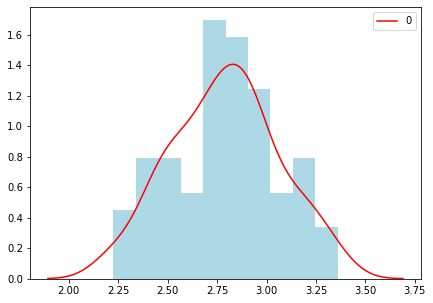

In [198]:
with plt.style.context('seaborn-bright'):
    plt.figure(figsize=(7,5))
    plt.hist(anger_out_pt,density=True,color='lightblue')
    sns.kdeplot(anger_out_pt,color='red')

#### **Skew Test**

In [199]:
scipy.stats.skew(anger_mood['Anger-Out'],bias=False)

0.5856542652644214

In [200]:
scipy.stats.skew(anger_out_pt,bias=False)

-0.0004965443387343199

In [201]:
scipy.stats.skew(anger_out_pt_ss,bias=False)

-0.0004965443387389054

In [202]:
scipy.stats.skewtest(anger_mood['Anger-Out'])

SkewtestResult(statistic=2.114149991165024, pvalue=0.03450245856975766)

In [203]:
scipy.stats.skewtest(anger_out_pt)

SkewtestResult(statistic=-0.0018956488195151877, pvalue=0.998487491980067)

In [204]:
scipy.stats.skewtest(anger_out_pt_ss)

SkewtestResult(statistic=-0.0018956488195325171, pvalue=0.9984874919800533)

#### **Kurtosis Test**

In [205]:
scipy.stats.kurtosis(anger_mood['Anger-Out'],bias=False)

-0.0579720414522944

In [206]:
scipy.stats.kurtosis(anger_out_pt,bias=False)

-0.4424467016261513

In [207]:
scipy.stats.kurtosis(anger_out_pt_ss,bias=False)

-0.4424467016261526

In [208]:
scipy.stats.kurtosistest(anger_mood['Anger-Out'])

KurtosistestResult(statistic=0.08226222673612164, pvalue=0.9344381912761975)

In [209]:
scipy.stats.kurtosistest(anger_out_pt)

KurtosistestResult(statistic=-0.8634396349496412, pvalue=0.38789579550255027)

In [210]:
scipy.stats.kurtosistest(anger_out_pt_ss)

KurtosistestResult(statistic=-0.8634396349496458, pvalue=0.3878957955025477)

#### **Anderson-Darling Test**

In [211]:
scipy.stats.anderson(anger_mood['Anger-Out'])

AndersonResult(statistic=0.8866161999077633, critical_values=array([0.55 , 0.626, 0.752, 0.877, 1.043]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))

In [212]:
scipy.stats.anderson(anger_out_pt)

AndersonResult(statistic=0.42091177774017297, critical_values=array([0.55 , 0.626, 0.752, 0.877, 1.043]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))

In [213]:
scipy.stats.anderson(anger_out_pt_ss)

AndersonResult(statistic=0.42091177774017297, critical_values=array([0.55 , 0.626, 0.752, 0.877, 1.043]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))

#### **D'Agastino Test**

In [214]:
scipy.stats.normaltest(anger_mood['Anger-Out'])

NormaltestResult(statistic=4.476397259090656, pvalue=0.10665044841294197)

In [215]:
scipy.stats.normaltest(anger_out_pt)

NormaltestResult(statistic=0.7455315966864164, pvalue=0.6888265382707246)

In [216]:
scipy.stats.normaltest(anger_out_pt_ss)

NormaltestResult(statistic=0.7455315966864247, pvalue=0.6888265382707217)

#### **QQ Plot**

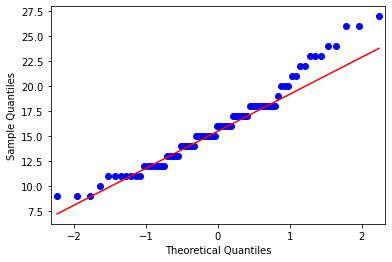

In [217]:
stm.graphics.gofplots.qqplot(data=anger_mood['Anger-Out'],line='q');

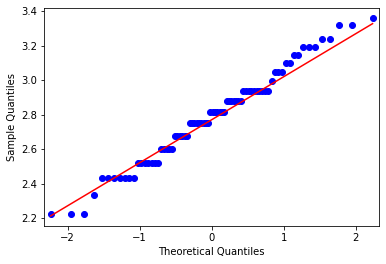

In [218]:
stm.graphics.gofplots.qqplot(data=anger_out_pt,line='q');

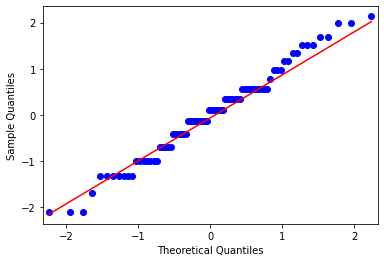

In [219]:
stm.graphics.gofplots.qqplot(data=anger_out_pt_ss,line='q');

#### **CDF Plot**

<AxesSubplot:>

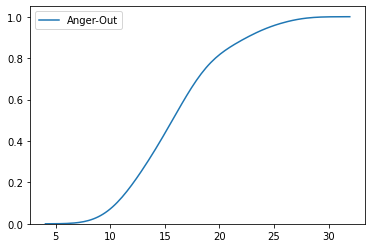

In [220]:
sns.kdeplot(anger_mood['Anger-Out'],cumulative=True)

<AxesSubplot:>

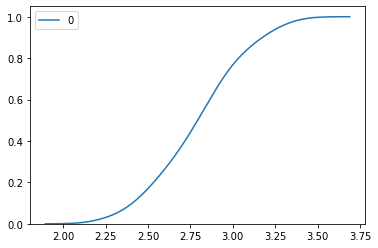

In [221]:
sns.kdeplot(anger_out_pt,cumulative=True)

<AxesSubplot:>

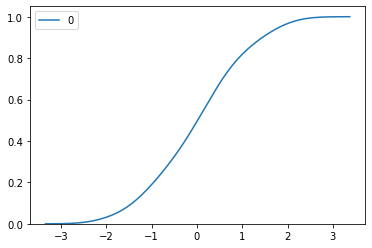

In [222]:
sns.kdeplot(anger_out_pt_ss,cumulative=True)

#### **KS Test**

In [223]:
np.round(np.mean(anger_mood['Anger-Out']),3), np.round(np.std(anger_mood['Anger-Out']),3)

(16.077, 4.19)

In [224]:
scipy.stats.kstest(anger_mood['Anger-Out'],'norm')

KstestResult(statistic=1.0, pvalue=0.0)

In [225]:
np.round(np.mean(anger_out_pt),3), np.round(np.std(anger_out_pt),3)

(2.788, 0.267)

In [226]:
scipy.stats.kstest(anger_out_pt,'norm')

KstestResult(statistic=0.9869662951831715, pvalue=1.889403494844932e-147)

In [227]:
anger_out_pt_ss = pd.DataFrame(ss.fit_transform(pd.DataFrame(anger_out_pt)))[0]

In [228]:
np.round(np.mean(anger_out_pt_ss),3), np.round(np.std(anger_out_pt_ss),3)

(0.0, 1.0)

In [229]:
scipy.stats.kstest(anger_out_pt_ss,'norm')

KstestResult(statistic=0.08117785751780704, pvalue=0.6527048356296961)